<div style="display: flex; background-color: #196f3d;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Implement a scoring model - P7</h1>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Modeling Notebook |</h3>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Initialization</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries</h3>
</div>

In [1]:
## General
import timeit
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.style as style
import importlib
import sys
import pickle

## Scikit Learn library
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     HalvingGridSearchCV, cross_validate, RepeatedStratifiedKFold, cross_val_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (precision_score, roc_auc_score, recall_score, 
                             f1_score, fbeta_score, confusion_matrix, roc_curve, 
                             PrecisionRecallDisplay, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score)
from sklearn.feature_selection import SelectKBest, f_classif

## mlflow tracking
import mlflow
mlflow.login()

## imbalanced-learn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## LightGBM
from lightgbm import LGBMClassifier, early_stopping


## Lightweight pipelining in Python
import joblib

## Own specific functions 
from functions import *

%matplotlib inline

2024/04/12 15:58:26 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [2]:
mlflow.set_tracking_uri("databricks")

mlflow.set_experiment("/P7")
# mlflow.sklearn.autolog()
mlflow.end_run()

In [3]:
from functions import *
importlib.reload(sys.modules['functions'])

<module 'functions' from 'c:\\Users\\blede\\OC\\P7\\functions.py'>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Parameters</h3>
</div>

In [4]:
# activation de l'etape fit des cacul des baseline
FIT_MODE_BSLINE = False
DF_BS_MODELS_METRICS = "Data\process\df_bs_models_metrics.csv"

# activation de l'etape fit de la recherche de Hyperparametres pour Random Forest
FIT_MODE_FT_RF = False
DF_CV_RESULTS_HT_RF = "Data\process\df_cv_results_ht_rf.csv"

# activation de l'etape fit de la recherche de Hyperparametres pour LightGBM
FIT_MODE_FT_lgbm = False
DF_CV_RESULTS_HT_lgbm = "Data\process\df_cv_results_ht_lgbm.csv"

# activation de l'etape fit de la recherche de Hyperparametres pour Gradiant Boosting
FIT_MODE_FT_gb = False
DF_CV_RESULTS_HT_gb = "Data\process\df_cv_results_ht_gb.csv"

#Generate new selected features list
GENERATE_NEW_FS_LIST = False
DF_FS_LIST = "Data\process\df_fs_list.csv"

#Fit of model Random Forest with class-weight
FIT_MODE_RF_CW = False
CLF_RF_CW_FILENAME = "models/classif_randof_class_weight.pkl"
DURATION_MODEL_CLF_RF_CW = "models/duration_classif_randof_class_weight.pkl"

#Fit of model LightGBM with class-weight
FIT_MODE_lgbm_CW = False
CLF_lgbm_CW_FILENAME = "models/classif_lightgbM_class_weight.pkl"
DURATION_MODEL_CLF_lgbm_CW = "models/duration_classif_lightgbM_class_weight.pkl"

#Fit of model Gradiant Boosting with class-weight
FIT_MODE_gb_CW = False
CLF_gb_CW_FILENAME = "models/classif_gradiantboost_class_weight.pkl"
DURATION_MODEL_CLF_gb_CW = "models/duration_classif_gradiantboost_class_weight.pkl"

#Fit of model Random Forest with oversampling
FIT_MODE_RF_OS = False
CLF_RF_OS_FILENAME = "models/classif_randof_oversampling.pkl"
DURATION_MODEL_CLF_RF_OS = "models/duration_classif_randof_oversampling.pkl"

#Fit of model LightGBM with oversampling
FIT_MODE_lgbm_OS = False
CLF_lgbm_OS_FILENAME = "models/classif_lightgbM_oversampling.pkl"
DURATION_MODEL_CLF_lgbm_OS = "models/duration_classif_lightgbM_oversampling.pkl"

#Fit of model Gradiant Boosting with oversampling
FIT_MODE_gb_OS = False
CLF_gb_OS_FILENAME = "models/classif_gradiantboost_oversampling.pkl"
DURATION_MODEL_CLF_gb_OS = "models/duration_classif_gradiantboost_oversampling.pkl"

#Fit of model Random Forest with undersampling
FIT_MODE_RF_US = False
CLF_RF_US_FILENAME = "models/classif_randof_undersampling.pkl"
DURATION_MODEL_CLF_RF_US = "models/duration_classif_randof_undersampling.pkl"

#Fit of model LightGBM with undersampling
FIT_MODE_lgbm_US = False
CLF_lgbm_US_FILENAME = "models/classif_lightgbM_undersampling.pkl"
DURATION_MODEL_CLF_lgbm_US = "models/duration_classif_lightgbM_undersampling.pkl"

#Fit of model Gradiant Boosting with undersampling
FIT_MODE_gb_US = False
CLF_gb_US_FILENAME = "models/classif_gradiantboost_undersampling.pkl"
DURATION_MODEL_CLF_gb_US = "models/duration_classif_gradiantboost_undersampling.pkl"

# #Fit of model Random Forest with Threshold-Moving
# FIT_MODE_RF_TM = True
# CLF_RF_TM_FILENAME = "models/classif_randof_thresholdmoving.pkl"
# DURATION_MODEL_CLF_RF_TM = "models/duration_classif_randof_thresholdmoving.pkl"

# #Fit of model LightGBM with Threshold-Moving
# FIT_MODE_lgbm_TM = True
# CLF_lgbm_TM_FILENAME = "models/classif_lightgbM_thresholdmoving.pkl"
# DURATION_MODEL_CLF_lgbm_TM = "models/duration_classif_lightgbM_thresholdmoving.pkl"

# #Fit of model Gradiant Boosting with Threshold-Moving
# FIT_MODE_gb_TM = True
# CLF_gb_TM_FILENAME = "models/classif_gradiantboost_thresholdmoving.pkl"
# DURATION_MODEL_CLF_gb_TM = "models/duration_classif_gradiantboost_thresholdmoving.pkl"

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Let's load the current clients
   </p>
</div>

In [5]:
path_data_i_dir = 'Data/initials_datasets/'
path_data_f_dir = "Data/finals_datasets/"

In [6]:
df_current_clients = pd.read_csv(path_data_f_dir+"df_current_clients.csv")

In [7]:
df_analysis(df_current_clients, "df_current_clients", analysis_type="header")


Analysis Header of df_current_clients dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 921.1 MB


In [8]:
df_clients_to_predict = pd.read_csv(path_data_f_dir+ "df_clients_to_predict.csv")

In [9]:
df_analysis(df_clients_to_predict, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 145.6 MB


<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <p>First of all, let's treat the memory to optimize its usage.</p>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Optimizing memory usage</h2>
</div>

<div class="alert alert-block alert-warning">
    <p>We should optimize the memory usage to avoid problems during executions</p>
</div>

In [10]:
df_current_clients = memory_optimization(df_current_clients)

In [11]:
df_analysis(df_current_clients, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 459.8 MB


In [12]:
df_clients_to_predict = memory_optimization(df_clients_to_predict)

In [13]:
df_analysis(df_clients_to_predict, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 76.3 MB


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>The memory usage has been reduced.</p>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Analyzing target variable</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to analyze the target variable to see whether is an imbalanced class
   </p>
</div>

c:\Users\blede\OC\P7\functions.py:301: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=labels, rotation=70, size=12,


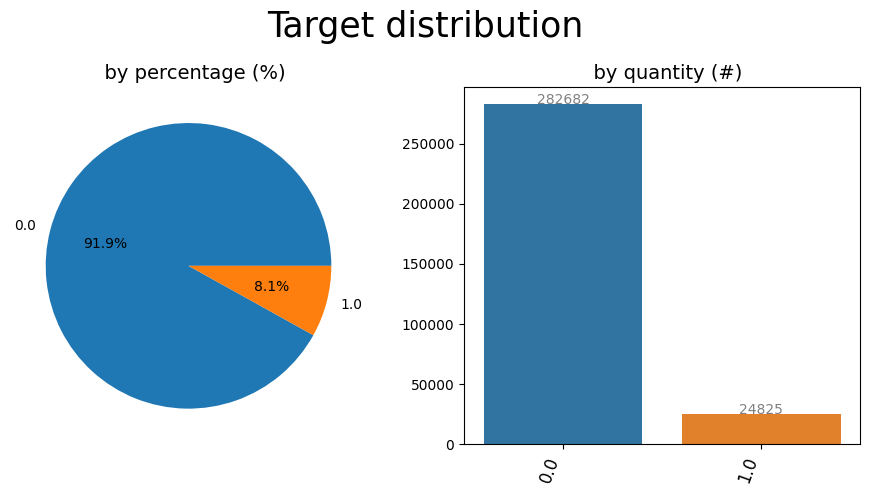

In [14]:
barplot_and_pie(df_current_clients["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-warning">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>Here we can see how much the dataset is imbalanced so, we are facing a imbalanced classification problem</li>
        <li>It is easily identifying that there are <b>loans that were repaid (0)</b> in comparison of <b>loans that were not repaid (1)</b>s</li>
        <li>We are going to treat the imbalanced class into a pipeline during the modeling</li>
    </ul> 
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Splitting data</h2>
</div>

<div class="alert alert-block alert-info">
    <p>First of all, let's identify the training columns in the dataset
   </p>
</div>

In [15]:
NOT_TRAINING_COLUMNS  = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"] 
TRAINING_COLUMNS = [col for col in df_current_clients.columns if col not in NOT_TRAINING_COLUMNS]

<div class="alert alert-block alert-info">
    <p>Let's split the all data
   </p>
</div>

In [16]:
X = df_current_clients[TRAINING_COLUMNS]

In [17]:
y_target = df_current_clients.loc[:,"TARGET"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.20, stratify=y_target, random_state=42)

In [19]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (246005, 506)
y_train: (246005,)
---------------------
X_test: (61502, 506)
y_test: (61502,)


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. Modelisation initial</h2>
</div>

<div class="alert alert-block alert-success">
    <p>We are going to face an <b>Unbalanced Classification Problem</b> and we are going to use three models</p>
    <ul style="list-style-type: square;">
        <li>Random Forest Classifier</li>
        <li>LightGBM</li>
        <li>Gradient Boosting</li>
    </ul>
    <p>Also, we are going to use a Dummy Classifier and baseline to compare the models</p>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. General parameters</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label.</p>
</div>

In [20]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

<div class="alert alert-block alert-info">
    <p>Metrics to use.</p>
</div>

In [21]:
scoring = ["roc_auc", "recall", "precision", "f1"]

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. Baselines</h3>
</div>

<div class="alert alert-block alert-info">
    <p>List of models to use. Dummy Classifier and Base line of the models</p>
</div>

In [22]:
classifiers = {
    "Dummy Classifier" : DummyClassifier(),
    "Baseline - Random Forest" : RandomForestClassifier(),
    "Baseline - LightGBM" : LGBMClassifier(),
    "Baseline - Gradient Boosting" : GradientBoostingClassifier()
}

In [23]:
# List of metrics results for each models 
LIST_MODEL, LIST_RECALL, LIST_ROC_AUC, LIST_F1, LIST_PREC, LIST_DURATION  = ([] for i in range(6))
if FIT_MODE_BSLINE:
    for key, clf in classifiers.items():
        print("Cross Validation du model: "+ key +"\n")
        start_time_model = timeit.default_timer()
        
        scores = cross_validate(clf, X_train, y_train, 
                                cv=stratified_kfold, scoring=scoring)
        
        end_time_model =  round(timeit.default_timer() - start_time_model, 3)
        print("-"*50)
        # Adding results into LIST
        LIST_MODEL.append(key)
        LIST_RECALL.append(round(scores.get("test_recall").mean(), 3))
        LIST_ROC_AUC.append(round(scores.get("test_roc_auc").mean(), 3))
        LIST_F1.append(round(scores.get("test_f1").mean(), 3))
        LIST_PREC.append(round(scores.get("test_precision").mean(), 3))
        LIST_DURATION.append(end_time_model)

<div class="alert alert-block alert-info">
    <p>Dataframe to compare metrics.</p>
</div>

In [24]:
if FIT_MODE_BSLINE:
    df_models_metrics = pd.DataFrame({
        "Model" : LIST_MODEL,
        "ROC-AUC" : LIST_ROC_AUC,
        "precision" : LIST_PREC,
        "Recall" : LIST_RECALL,    
        "F1" : LIST_F1,
        "Duration (min)" : LIST_DURATION,
    })
    df_models_metrics.to_csv(DF_BS_MODELS_METRICS, index=False)
else:
    df_models_metrics = pd.read_csv(DF_BS_MODELS_METRICS)

<div class="alert alert-block alert-info">
    <p>Let's transform the duration to minutes.</p>
</div>

In [25]:
df_models_metrics["Duration (min)"] = round(df_models_metrics["Duration (min)"]/60, 1)

In [26]:
df_models_metrics

,Model,ROC-AUC,precision,Recall,F1,Duration (min)
0,Dummy Classifier,0.500,0.000,0.000,0.000,6.7
1,Baseline - Random Forest,0.713,0.850,0.001,0.002,21.3
2,Baseline - LightgbM,0.773,0.521,0.033,0.062,0.4
3,Baseline - Gradient Boosting,0.765,0.515,0.019,0.036,31.7


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>it is easy to see how much time the ensembles models. Due to that, we do not consider to plot the duration</p>
</div>

In [27]:
COLUMNS = ["Model", "Recall", "ROC-AUC", "F1", "precision"]

In [28]:
df_models_metrics_reduced = pd.melt(df_models_metrics[COLUMNS], id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_reduced.head(12)

,Model,Metric,Value
0,Dummy Classifier,Recall,0.000
1,Baseline - Random Forest,Recall,0.001
2,Baseline - LightgbM,Recall,0.033
3,Baseline - Gradient Boosting,Recall,0.019
4,Dummy Classifier,ROC-AUC,0.500
5,Baseline - Random Forest,ROC-AUC,0.713
6,Baseline - LightgbM,ROC-AUC,0.773
7,Baseline - Gradient Boosting,ROC-AUC,0.765
8,Dummy Classifier,F1,0.000
9,Baseline - Random Forest,F1,0.002


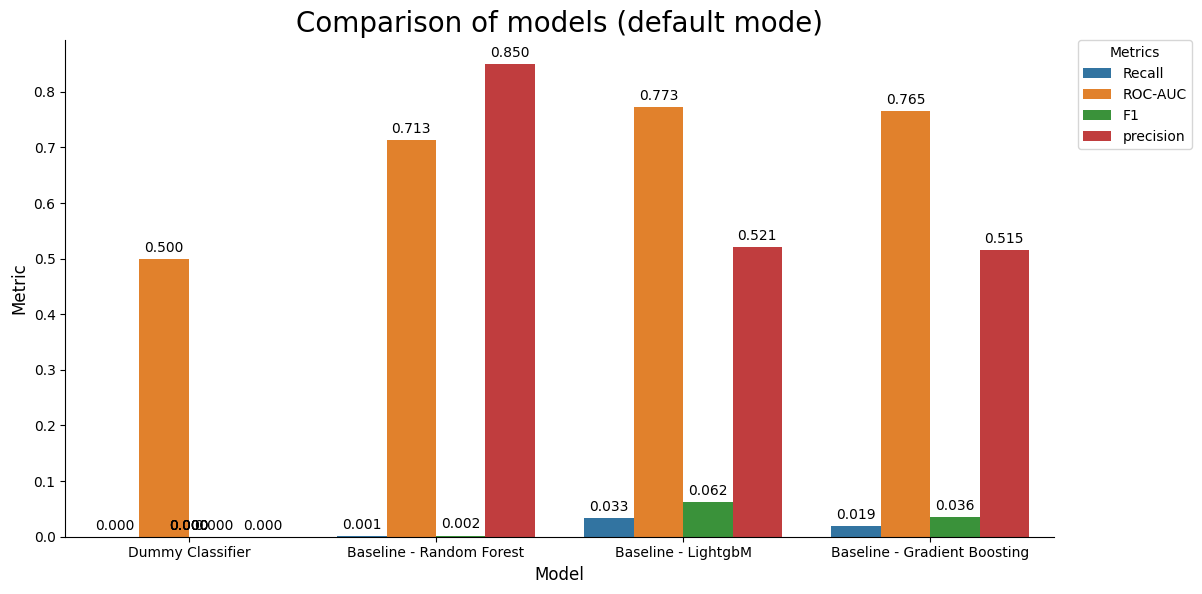

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_reduced, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of models (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.14, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>LightGBM and Gradient Boosting got the best result based on ROC-AUC but, we have to consider the execution time that is not in the plot</p>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.3. Hyperparameters Tuning</h3>
</div>

<div class="alert alert-block alert-info">
    <p>For reasons of processing cost, we are going to tune the models with a subsample of the data.<br>Done this, we will proceed to continue the modeling with the parameters obtained.</p>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.1. Subsample of the data</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to do a subsamble of the dataset to tune some parameters before the modeling
   </p>
</div>

In [30]:
df_subsample = df_current_clients.copy()

In [31]:
df_subsample = df_subsample.sample(frac=0.2)

c:\Users\blede\OC\P7\functions.py:301: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels=labels, rotation=70, size=12,


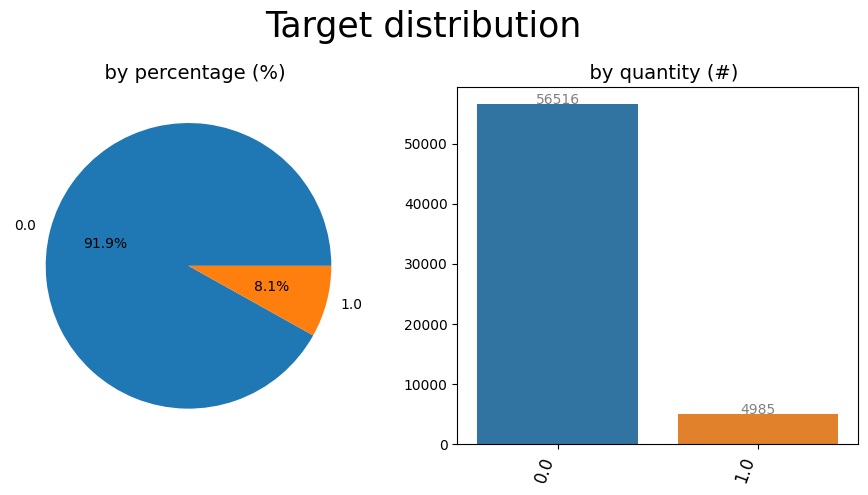

In [32]:
barplot_and_pie(df_subsample["TARGET"], "Target distribution", " ")

<div class="alert alert-block alert-info">
    <p>Now, we are going to split the subsample of the data to tune the models
   </p>
</div>

In [33]:
X_ss = df_subsample[TRAINING_COLUMNS]

In [34]:
y_target_ss = df_subsample.loc[:,"TARGET"]

In [35]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_target_ss, test_size=0.20, stratify=y_target_ss, random_state=42)

In [36]:
print("X_train_ss: {}".format(X_train_ss.shape))
print("y_train_ss: {}".format(y_train_ss.shape))
print("---------------------")
print("X_test_ss: {}".format(X_test_ss.shape))
print("y_test_ss: {}".format(y_test_ss.shape))

X_train_ss: (49200, 506)
y_train_ss: (49200,)
---------------------
X_test_ss: (12301, 506)
y_test_ss: (12301,)


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.2. Random Forest</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to tune the Random Forest model</p>
    <p>Parameters settings</p>
</div>

In [37]:
param_grid = {
    "n_estimators" : np.arange(500, 1000, 100),
    "max_depth" : np.arange(20, 30, 2),
}

<div class="alert alert-block alert-info">
    <p>Executing the model</p>
</div>

In [38]:
clf_rf = RandomForestClassifier(random_state=42)

In [39]:
search_rf = HalvingGridSearchCV(clf_rf, param_grid, scoring="roc_auc", cv=stratified_kfold, n_jobs=-1)

In [40]:
mlflow.sklearn.autolog(disable=True)
if FIT_MODE_FT_RF:
    start_time_Hyp_tuning = timeit.default_timer()
    search_rf.fit(X_train_ss, y_train_ss)
    end_time_Hyp_tuning =  round(timeit.default_timer() - start_time_Hyp_tuning, 3)
    duration_min_clf_rf = round(end_time_Hyp_tuning/60, 1)
    search_rf_cv_results_df = pd.DataFrame(search_rf.cv_results_)
    search_rf_cv_results_df["duration_min_clf_rf"] = duration_min_clf_rf
    search_rf_cv_results_df.to_csv(DF_CV_RESULTS_HT_RF, index=False)
    best_params_rf = search_rf.best_params_
else:
    search_rf_cv_results_df = pd.read_csv(DF_CV_RESULTS_HT_RF)
    duration_min_clf_rf = search_rf_cv_results_df["duration_min_clf_rf"].unique()[0]
    best_params_rf = eval(search_rf_cv_results_df[search_rf_cv_results_df['rank_test_score'] == 1]['params'].to_list()[0])

In [41]:
print("Random Forest Classifier - Hyperparameters Tuning Duration (min): ",duration_min_clf_rf)

Random Forest Classifier - Hyperparameters Tuning Duration (min):  15.1


<div class="alert alert-block alert-info">
    <p>ROC-AUC score</p>
</div>

In [42]:
best_score_rf = search_rf_cv_results_df[search_rf_cv_results_df['rank_test_score'] == 1]['mean_test_score'].to_list()[0] 
best_score_rf  

0.7255141068146885

<div class="alert alert-block alert-info">
    <p>The best parameters</p>
</div>

In [43]:

best_params_rf

{'max_depth': 20, 'n_estimators': 600}

In [44]:
rf_parameters = best_params_rf

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.3. LightGBM</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to tune the Random LightGBM</p>
    <p>Parameters settings</p>
</div>

In [45]:
param_grid = {
    "n_estimators" : [8000, 10000],
    "num_leaves" : [32, 34], 
    "max_depth" : [8, 9]
}

<div class="alert alert-block alert-info">
    <p>Executing the model</p>
</div>

In [46]:
clf_lgbm = LGBMClassifier(random_state=42)

In [47]:
search_lgbm = HalvingGridSearchCV(clf_lgbm, param_grid, scoring="roc_auc", cv=stratified_kfold, n_jobs=-1)

In [48]:
if FIT_MODE_FT_lgbm:
    start_time_Hyp_tuning = timeit.default_timer()
    
    search_lgbm.fit(X_train_ss, y_train_ss)
    
    end_time_Hyp_tuning =  round(timeit.default_timer() - start_time_Hyp_tuning, 3)
    duration_min_clf_lgbm = round(end_time_Hyp_tuning/60, 1)
    search_lgbm_cv_results_df = pd.DataFrame(search_lgbm.cv_results_)
    search_lgbm_cv_results_df["duration_min_clf_rf"] = duration_min_clf_lgbm
    search_lgbm_cv_results_df.to_csv(DF_CV_RESULTS_HT_lgbm, index=False)
    best_params_lgbm = search_lgbm.best_params_
else:
    search_lgbm_cv_results_df = pd.read_csv(DF_CV_RESULTS_HT_lgbm)
    duration_min_clf_lgbm = search_lgbm_cv_results_df["duration_min_clf_rf"].unique()[0]
    best_params_lgbm = eval(search_lgbm_cv_results_df[search_lgbm_cv_results_df['rank_test_score'] == 1]['params'].to_list()[0])

In [49]:
print("LightGBM - Hyperparameters Tuning Duration (min): ",duration_min_clf_lgbm)

LightGBM - Hyperparameters Tuning Duration (min):  21.9


<div class="alert alert-block alert-info">
    <p>ROC-AUC score</p>
</div>

In [50]:
best_score_lgbm = search_lgbm_cv_results_df[search_lgbm_cv_results_df['rank_test_score'] == 1]['mean_test_score'].to_list()[0] 
best_score_lgbm  
# search_lgbm.best_score_

0.7274565671705074

<div class="alert alert-block alert-info">
    <p>The best parameters</p>
</div>

In [51]:
best_params_lgbm
# search_lgbm.best_params_

{'max_depth': 9, 'n_estimators': 8000, 'num_leaves': 32}

In [52]:
lgbm_parameters = best_params_lgbm
# lgbm_parameters = search_lgbm.best_params_

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.4. Gradient Boosting</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Let's try to tune the Random LightGBM</p>
    <p>Parameters settings</p>
</div>

In [53]:
param_grid = {
    "n_estimators" : np.arange(500, 1000, 100),
    "max_depth" : np.arange(20, 30, 2),
}

<div class="alert alert-block alert-info">
    <p>Executing the model.<br>In this case, we are going to add some parameters to reduce the execution time</p>
</div>

In [54]:
clf_gb = GradientBoostingClassifier(validation_fraction=0.2, 
                                    n_iter_no_change=5,
                                    tol=0.01,
                                    random_state=42)

In [55]:
search_gb = HalvingGridSearchCV(clf_gb, param_grid, scoring="roc_auc", cv=stratified_kfold, n_jobs=-1)

In [56]:
if FIT_MODE_FT_gb:
    start_time_Hyp_tuning = timeit.default_timer()
    search_gb.fit(X_train_ss, y_train_ss)
    end_time_Hyp_tuning =  round(timeit.default_timer() - start_time_Hyp_tuning, 3)
    duration_min_clf_gb = round(end_time_Hyp_tuning/60, 1)
    search_gb_cv_results_df = pd.DataFrame(search_gb.cv_results_)
    search_gb_cv_results_df["duration_min_clf_gb"] = duration_min_clf_gb
    search_gb_cv_results_df.to_csv(DF_CV_RESULTS_HT_gb, index=False)
    best_params_gb = search_gb.best_params_
else:
    search_gb_cv_results_df = pd.read_csv(DF_CV_RESULTS_HT_gb)
    duration_min_clf_gb = search_gb_cv_results_df["duration_min_clf_gb"].unique()[0]
    best_params_gb = eval(search_gb_cv_results_df[search_gb_cv_results_df['rank_test_score'] == 1]['params'].to_list()[0])

In [57]:
print("Gradient Boosting - Hyperparameters Tuning Duration (min): ",duration_min_clf_gb)

Gradient Boosting - Hyperparameters Tuning Duration (min):  4.8


<div class="alert alert-block alert-info">
    <p>ROC-AUC score</p>
</div>

In [58]:
best_score_gb = search_gb_cv_results_df[search_gb_cv_results_df['rank_test_score'] == 1]['mean_test_score'].to_list()[0] 
best_score_gb  
# search_gb.best_score_

0.6190052212487104

<div class="alert alert-block alert-info">
    <p>The best parameters</p>
</div>

In [59]:
best_params_gb
# search_gb.best_params_

{'max_depth': 20, 'n_estimators': 700}

In [60]:
gb_parameters = best_params_gb
# gb_parameters = search_gb.best_params_

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. features importances</h2>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. lgbm features importances</h3>
</div>

In [61]:
X_train_ss_tr = X_train_ss.copy()
X_train_ss_tr['TARGET']=y_train_ss
X_test_ss_tr = X_test_ss.copy()
X_test_ss_tr['TARGET']=y_test_ss
X_train_ss_tr.reset_index(inplace=True)
X_test_ss_tr.reset_index(inplace=True)

In [62]:
X_test_ss_tr.shape

(12301, 508)

In [63]:
%%time
fs_threshold=0.8
# Define, and Save the selected_features to csv 
if GENERATE_NEW_FS_LIST:
    fi_test_ss, metrics_test_ss = CV_train_test_model_lgbm(X_train_ss_tr, X_test_ss_tr)
    fi_test_ss_plot=fi_test_ss.copy()
    fi_test_ss_plot = fi_test_ss_plot.sort_values('importance', ascending = False).reset_index(drop=True)
    fi_test_ss_plot['importance_normalized'] = fi_test_ss_plot['importance'] / fi_test_ss_plot['importance'].sum()
    # Calculate the cumulative sum
    fi_test_ss_plot['cumulative_sum'] = fi_test_ss_plot['importance_normalized'].cumsum()
    
    # Sort the DataFrame in descending order based on the cumulative sum
    fi_test_ss_plot = fi_test_ss_plot.sort_values('cumulative_sum', ascending=True)
    
    # Plot the cumulative sum using seaborn
    fig = plt.figure(figsize=(10, 5)) 
    p = sns.barplot(x='feature', y='cumulative_sum',  data=fi_test_ss_plot)
    # Add a vertical line at cumulative sum < 0.85
    highlighted_params = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]['feature']
    highlighted_indices = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold].index
    for i in highlighted_indices:
        p.get_children()[i].set_color('green')
    p.set_xticklabels([]) 
    plt.show()
    
    # Filter the DataFrame based on the condition
    filtered_df = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]
    
    # Get the list of parameters
    fs_list = filtered_df['feature'].tolist()
    fs_list.remove('index')

    # Save the selected_features to csv
    keys=["fs_list"]
    values=[[fs_list]]
    dict_fs_list=dict(zip(keys, values))
    df_fs_list = pd.DataFrame(dict_fs_list)
    df_fs_list.to_csv(DF_FS_LIST, index=False)

else:
    fs_list = pd.read_csv(DF_FS_LIST)
    fs_list = eval(fs_list.iloc[0,0])
    fs_list.remove('index')

ValueError: list.remove(x): x not in list

In [64]:

# fi_test_ss_plot=fi_test_ss.copy()
# fi_test_ss_plot = fi_test_ss_plot.sort_values('importance', ascending = False).reset_index(drop=True)
# fi_test_ss_plot['importance_normalized'] = fi_test_ss_plot['importance'] / fi_test_ss_plot['importance'].sum()
# # Calculate the cumulative sum
# fi_test_ss_plot['cumulative_sum'] = fi_test_ss_plot['importance_normalized'].cumsum()

# # Sort the DataFrame in descending order based on the cumulative sum
# fi_test_ss_plot = fi_test_ss_plot.sort_values('cumulative_sum', ascending=True)

# # Plot the cumulative sum using seaborn
# fig = plt.figure(figsize=(10, 5)) 
# p = sns.barplot(x='feature', y='cumulative_sum',  data=fi_test_ss_plot)
# # Add a vertical line at cumulative sum < 0.85
# highlighted_params = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]['feature']
# highlighted_indices = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold].index
# for i in highlighted_indices:
#     p.get_children()[i].set_color('green')
# p.set_xticklabels([]) 
# plt.show()

In [65]:
# # Filter the DataFrame based on the condition
# filtered_df = fi_test_ss_plot[fi_test_ss_plot['cumulative_sum'] < fs_threshold]

# # Get the list of parameters
# fs_list = filtered_df['feature'].tolist()
# fs_list.remove('index')

In [66]:
len(fs_list)

131

In [67]:
# # Save the selected_features to csv 
# if GENERATE_NEW_FS_LIST:
#     keys=["fs_list"]
#     values=[[fs_list]]
#     dict_fs_list=dict(zip(keys, values))
#     df_fs_list = pd.DataFrame(dict_fs_list)
#     df_fs_list.to_csv(DF_FS_LIST, index=False)
# else:
#     fs_list = pd.read_csv(DF_FS_LIST)
#     fs_list = eval(fs_list.iloc[0,0])
#     fs_list.remove('index')

In [68]:
X_train_fs = X_train[fs_list]
X_test_fs = X_test[fs_list]
print(f"X_train_fs.shape: {X_train_fs.shape} \n X_test_fs.shape: {X_test_fs.shape}")

X_train_fs.shape: (246005, 131) 
 X_test_fs.shape: (61502, 131)


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">8. Modelisation using class_weight</h2>
</div>

<div class="alert alert-block alert-info">
    <p>At this point, we are going to use the parameter <b>class_weight</b> to affect the computation of the model to penalize differently a false classification from the minority and majority class </p>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.1. Random Forest</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's execute the model considering the parameters obtained</p>
</div>

In [69]:
clf_rf_cw = RandomForestClassifier(**rf_parameters,
                                   class_weight="balanced",
                                   random_state=42,
                                   n_jobs=-1)

<div class="alert alert-block alert-info">
    <p>Executing the model with the complete dataset</p>
</div>

In [70]:
if FIT_MODE_RF_CW:
    start_time_model = timeit.default_timer()
    # with mlflow.start_run(run_name = 'classif_randof_class_weight'):
    clf_rf_cw.fit(X_train_fs, y_train)
    end_time_model_clf_rf_cw =  round(timeit.default_timer() - start_time_model, 3)

    pickle.dump(clf_rf_cw, open(CLF_RF_CW_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_rf_cw, open(DURATION_MODEL_CLF_RF_CW, 'wb'))
else:
    clf_rf_cw = pickle.load(open(CLF_RF_CW_FILENAME, 'rb'))
    end_time_model_clf_rf_cw = pickle.load(open(DURATION_MODEL_CLF_RF_CW, 'rb'))

In [71]:
end_time_model_clf_rf_cw

213.953

In [72]:
# clf_rf_cw_load

In [73]:
clf_rf_cw.n_features_in_

131

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [74]:
y_pred = clf_rf_cw.predict(X_test_fs)
y_prob = clf_rf_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [75]:
roc_auc_clf_rf_cw = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_rf_cw, recall_1_clf_rf_cw = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_cw = round(f1_score(y_test, y_pred), 3)
precision_clf_rf_cw = round(precision_score(y_test, y_pred), 3)
print("roc_auc_clf_rf_cw: " + str(roc_auc_clf_rf_cw) + "\n recall_1_clf_rf_cw: "+ str(recall_1_clf_rf_cw) + "\n f1_clf_rf_cw: "+str(f1_clf_rf_cw)+ "\n precision_clf_rf_cw: "+str(precision_clf_rf_cw))

roc_auc_clf_rf_cw: 0.748
 recall_1_clf_rf_cw: 0.107
 f1_clf_rf_cw: 0.162
 precision_clf_rf_cw: 0.34


In [76]:
# roc_auc_clf_rf_cw = round(roc_auc_score(y_test, y_prob), 3)
# recall_0_clf_rf_cw, recall_1_clf_rf_cw = recall_score(y_test, y_pred, average=None).round(3)
# f1_clf_rf_cw = round(f1_score(y_test, y_pred), 3)
# precision_clf_rf_cw = round(precision_score(y_test, y_pred), 3)

In [77]:
roc_auc_clf_rf_cw

0.748

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

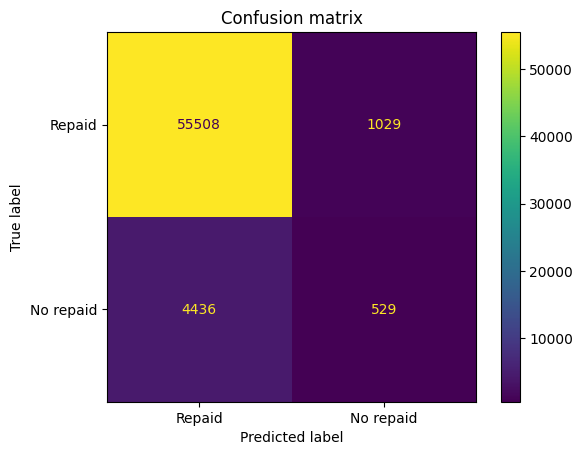

In [78]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

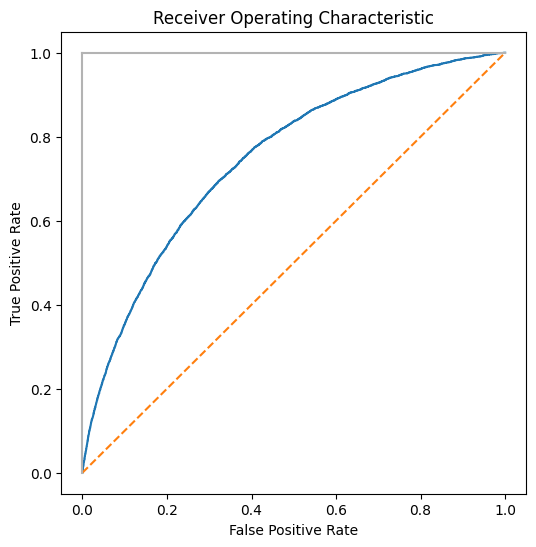

In [79]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

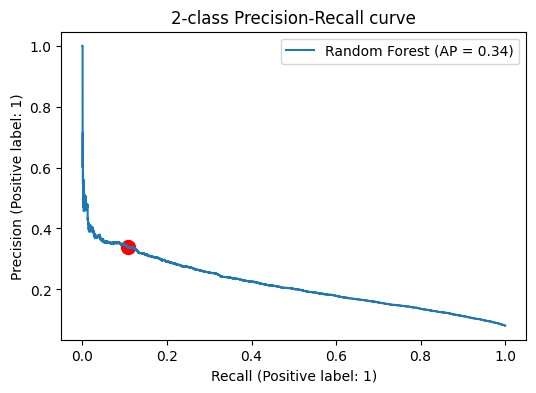

In [80]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_rf_cw, precision_clf_rf_cw, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision_clf_rf_cw)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [81]:
df_models_metrics_complete = pd.DataFrame({
    "Model" : ["Class weight - Random Forest"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_rf_cw,    
    # "Recall - 0" : recall_0_clf_rf_cw,
    "Precision - 1" : precision_clf_rf_cw,
    "Recall - 1" : recall_1_clf_rf_cw,
    "F1 - 1" : f1_clf_rf_cw,    
    "Duration (min)" : round(end_time_model_clf_rf_cw/60, 1)
})

In [82]:
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.34,0.107,0.162,3.6


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.2. LightGBM</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's execute the model considering the parameters obtained</p>
    <p>In this case, we are also going to consider the parameters used on the Kernel's Kaggle selected</p>
</div>

In [83]:
clf_lgbm_cw = LGBMClassifier(**lgbm_parameters, class_weight="balanced", learning_rate=0.02,
                             colsample_bytree=0.9497036, subsample=0.8715623,
                             reg_alpha=0.041545473, reg_lambda=0.0735294,
                             min_split_gain=0.0222415, min_child_weight=39.3259775,
                             random_state=42, n_jobs=-1)

<div class="alert alert-block alert-info">
    <p>Executing the model with the complete dataset</p>
</div>

In [84]:
if FIT_MODE_lgbm_CW:
    start_time_model = timeit.default_timer()
    
    clf_lgbm_cw.fit(X_train_fs, y_train)
    
    end_time_model_clf_lgbm_cw =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_lgbm_cw, open(CLF_lgbm_CW_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_lgbm_cw, open(DURATION_MODEL_CLF_lgbm_CW, 'wb'))
else:
    clf_lgbm_cw = pickle.load(open(CLF_lgbm_CW_FILENAME, 'rb'))
    end_time_model_clf_lgbm_cw = pickle.load(open(DURATION_MODEL_CLF_lgbm_CW, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [85]:
y_pred = clf_lgbm_cw.predict(X_test_fs)
y_prob = clf_lgbm_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [86]:
roc_auc_clf_lgbm_cw = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_lgbm_cw, recall_1_clf_lgbm_cw = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_cw = round(f1_score(y_test, y_pred), 3)
precision_clf_lgbm_cw = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

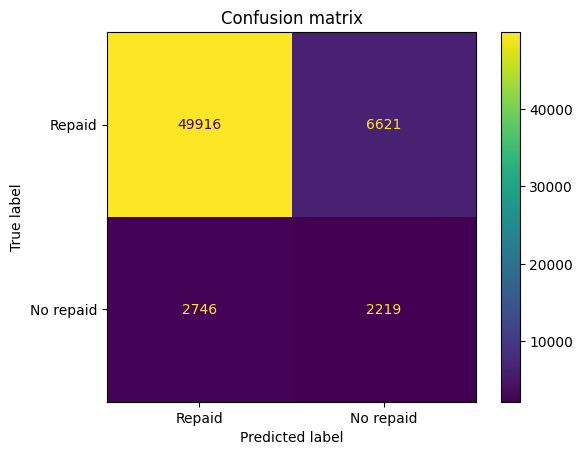

In [87]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

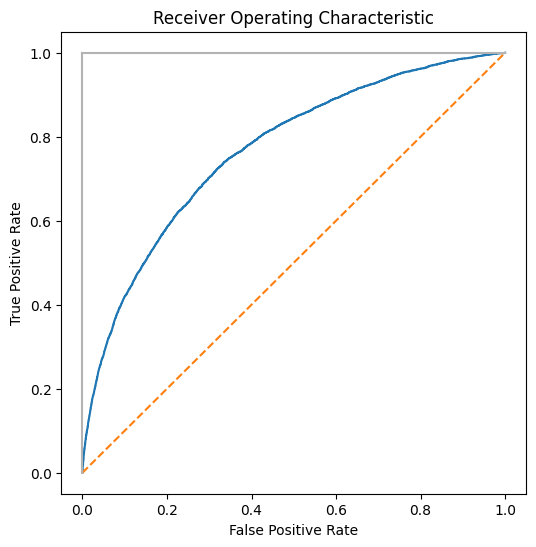

In [88]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

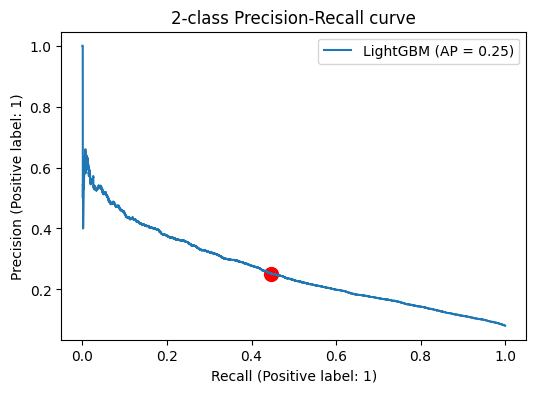

In [89]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_lgbm_cw, precision_clf_lgbm_cw, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision_clf_lgbm_cw)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [90]:
df_temp = pd.DataFrame({
    "Model" : ["Class weight - LightGBM"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_lgbm_cw,    
    # "Recall - 0" : recall_0_clf_lgbm_cw,
    "Precision - 1" : precision_clf_lgbm_cw,
    "Recall - 1" : recall_1_clf_lgbm_cw,
    "F1 - 1" : f1_clf_lgbm_cw,    
    "Duration (min)" : round(end_time_model_clf_lgbm_cw/60, 1)
})

In [91]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.3. Gradient Boosting</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Unfortunately, Gradient Boosting (gbM) doesn't have a parameters call <b>class_weight</b> to treat with Imbalanced Class.</p>
    <p>But, gbM deals with class imbalance by constructing successive training sets based on incorrectly classified examples</p>
</div>

In [92]:
clf_gb_cw = GradientBoostingClassifier(**gb_parameters, 
                                       validation_fraction=0.2, 
                                       n_iter_no_change=5,
                                       tol=0.01, random_state=42)

<div class="alert alert-block alert-info">
    <p>Executing the model with the complete dataset</p>
</div>

In [93]:
if FIT_MODE_gb_CW:
    start_time_model = timeit.default_timer()
    
    clf_gb_cw.fit(X_train_fs, y_train)
    
    end_time_model_clf_gb_cw =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_gb_cw, open(CLF_gb_CW_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_gb_cw, open(DURATION_MODEL_CLF_gb_CW, 'wb'))
else:
    clf_gb_cw = pickle.load(open(CLF_gb_CW_FILENAME, 'rb'))
    end_time_model_clf_gb_cw = pickle.load(open(DURATION_MODEL_CLF_gb_CW, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [94]:
y_pred = clf_gb_cw.predict(X_test_fs)
y_prob = clf_gb_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [95]:
roc_auc_clf_gb_cw = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_gb_cw, recall_1_clf_gb_cw = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_cw = round(f1_score(y_test, y_pred), 3)
precision_clf_gb_cw = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

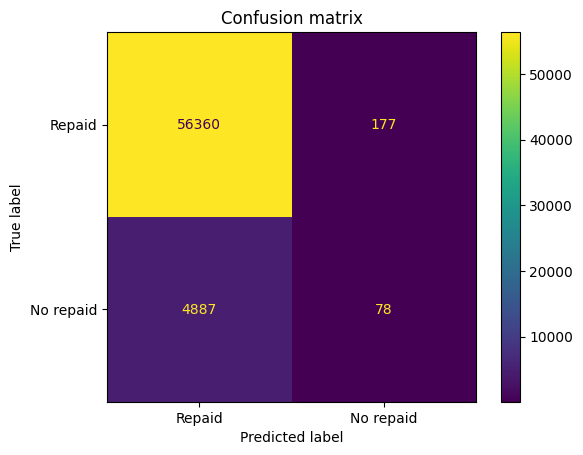

In [96]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

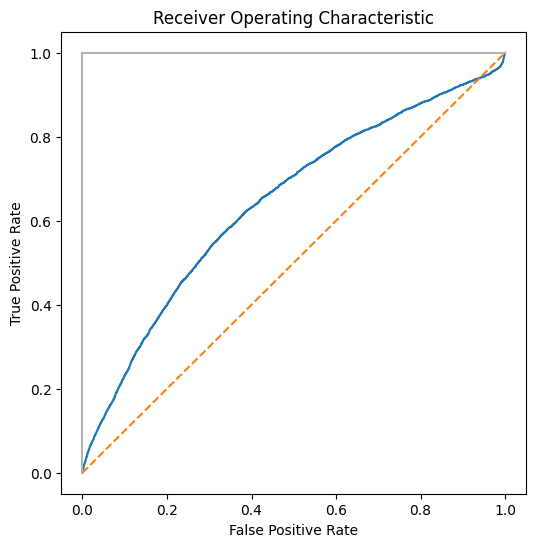

In [97]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

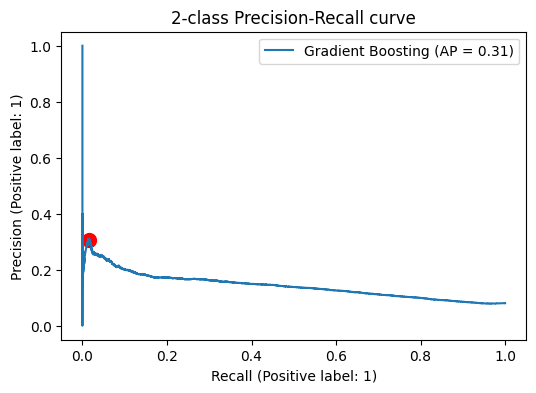

In [98]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_gb_cw, precision_clf_gb_cw, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision_clf_gb_cw)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [99]:
df_temp = pd.DataFrame({
    "Model" : ["Tuned - Gradient Boosting"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_gb_cw,    
    # "Recall - 0" : recall_0_clf_gb_cw,
    "Precision - 1" : precision_clf_gb_cw,
    "Recall - 1" : recall_1_clf_gb_cw,
    "F1 - 1" : f1_clf_gb_cw,    
    "Duration (min)" : round(end_time_model_clf_gb_cw/60, 1)
})

In [100]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li><b>Class weight - Random Forest</b> and <b>Class weight - LightGBM</b> have improved their scores</li>
        <li><b>Tuned - Gradient Boosting</b> doesn't have a parameter Class weight to treat with Imbalanced Class. It treats Imbalanced Class internally</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">9. Modelisation using OverSampling</h2>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.</p>
</div>

In [101]:
smote = SMOTE(random_state=42, n_jobs=-1)

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.1. Random Forest</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [102]:
clf_rf_os = imbpipeline(steps = [["Smote", smote],
                                 ["Random_Forest", RandomForestClassifier(**rf_parameters,
                                                                          random_state=42,
                                                                          n_jobs=-1)]
                                 ]
                        )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [103]:
if FIT_MODE_RF_OS:
    start_time_model = timeit.default_timer()
    
    clf_rf_os.fit(X_train_fs, y_train)
    
    end_time_model_clf_rf_os =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_rf_os, open(CLF_RF_OS_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_rf_os, open(DURATION_MODEL_CLF_RF_OS, 'wb'))
else:
    clf_rf_os = pickle.load(open(CLF_RF_OS_FILENAME, 'rb'))
    end_time_model_clf_rf_os = pickle.load(open(DURATION_MODEL_CLF_RF_OS, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [104]:
y_pred = clf_rf_os.predict(X_test_fs)
y_prob = clf_rf_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [105]:
roc_auc_clf_rf_os = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_rf_os, recall_1_clf_rf_os = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_os = round(f1_score(y_test, y_pred), 3)
precision_clf_rf_os = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

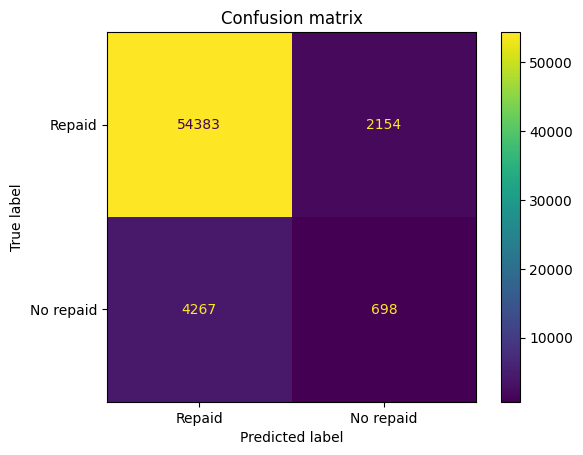

In [106]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

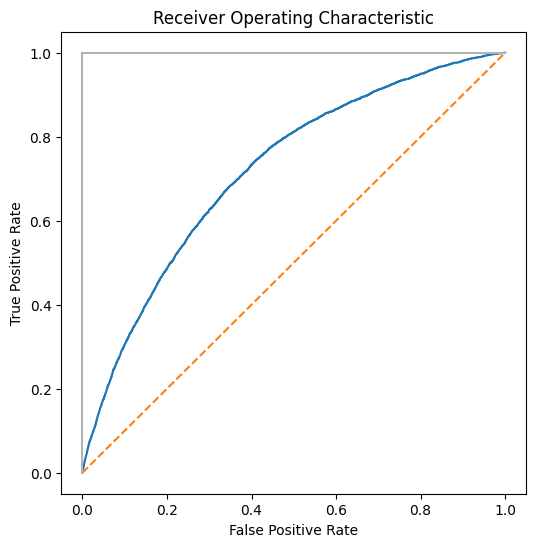

In [107]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

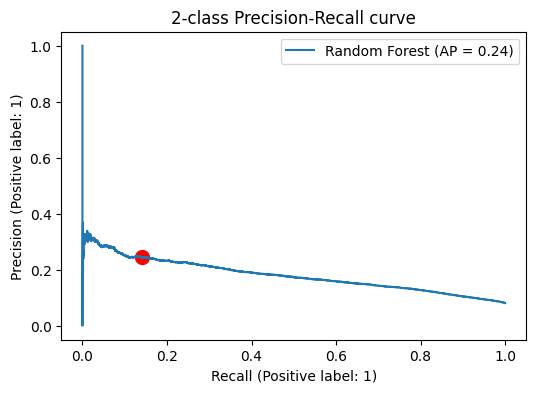

In [108]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_rf_os, precision_clf_rf_os, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision_clf_rf_os)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [109]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling - Random Forest"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_rf_os,    
    # "Recall - 0" : recall_0_clf_rf_os,
    "Precision - 1" : precision_clf_rf_os,
    "Recall - 1" : recall_1_clf_rf_os,    
    "F1 - 1" : f1_clf_rf_os,    
    "Duration (min)" : round(end_time_model_clf_rf_os/60, 1)
})

In [110]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.5,0.720,0.245,0.141,0.179,9.4


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.2. LightGBM</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [111]:
clf_lgbm_os = imbpipeline(steps = [["Smote", smote],
                                   ["LightGBM", LGBMClassifier(**lgbm_parameters, learning_rate=0.02,
                                                                    colsample_bytree=0.9497036, subsample=0.8715623,
                                                                    reg_alpha=0.041545473, reg_lambda=0.0735294,
                                                                    min_split_gain=0.0222415, min_child_weight=39.3259775,
                                                                    random_state=42, n_jobs=-1)]
                                   ]
                          )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [112]:
if FIT_MODE_lgbm_OS:
    start_time_model = timeit.default_timer()
    
    clf_lgbm_os.fit(X_train_fs, y_train, LightGBM__callbacks=[early_stopping(stopping_rounds=50)], LightGBM__eval_set=[(X_test_fs, y_test)])
    
    end_time_model_clf_lgbm_os =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_lgbm_os, open(CLF_lgbm_OS_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_lgbm_os, open(DURATION_MODEL_CLF_lgbm_OS, 'wb'))
else:
    clf_lgbm_os = pickle.load(open(CLF_lgbm_OS_FILENAME, 'rb'))
    end_time_model_clf_lgbm_os = pickle.load(open(DURATION_MODEL_CLF_lgbm_OS, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [113]:
y_pred = clf_lgbm_os.predict(X_test_fs)
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [114]:
roc_auc_clf_lgbm_os = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_lgbm_os, recall_1_clf_lgbm_os = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_os = round(f1_score(y_test, y_pred), 3)
precision_clf_lgbm_os = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

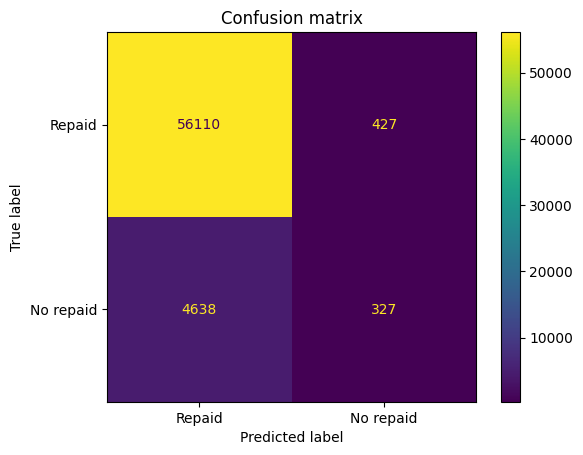

In [115]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

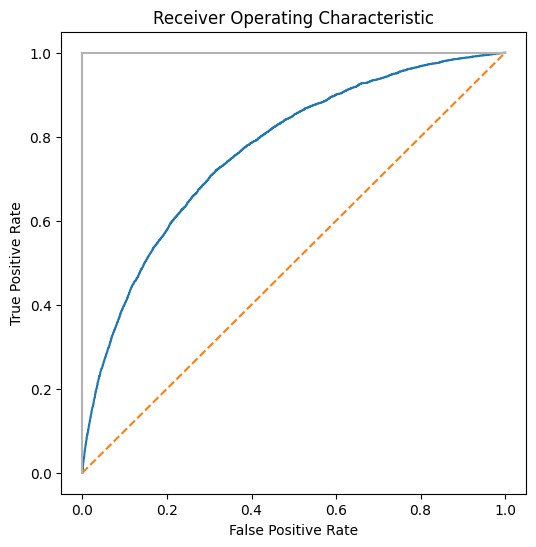

In [116]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

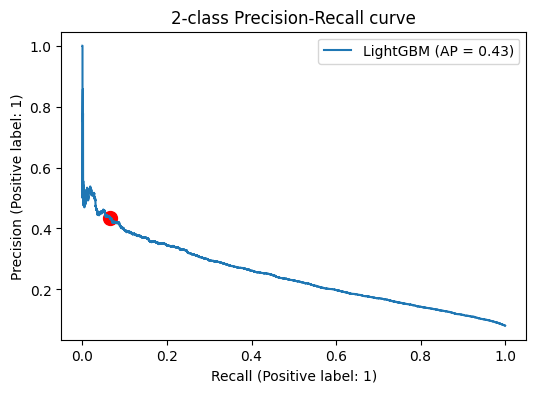

In [117]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_lgbm_os, precision_clf_lgbm_os, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision_clf_lgbm_os)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [118]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling - LightGBM"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_lgbm_os,    
    # "Recall - 0" : recall_0_clf_lgbm_os,
    "Precision - 1" : precision_clf_lgbm_os,
    "Recall - 1" : recall_1_clf_lgbm_os,    
    "F1 - 1" : f1_clf_lgbm_os,    
    "Duration (min)" : round(end_time_model_clf_lgbm_os/60, 1)
})

In [119]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.5,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.5,0.767,0.434,0.066,0.114,2.9


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Gradient Boosting</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [120]:
clf_gb_os = imbpipeline(steps = [["Smote", smote],
                                 ["Gradient Boosting", GradientBoostingClassifier(**gb_parameters,
                                                                                  validation_fraction=0.2, 
                                                                                  n_iter_no_change=5,
                                                                                  tol=0.01, random_state=42)]
                                ]
                       )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [121]:
if FIT_MODE_gb_OS:
    start_time_model = timeit.default_timer()
    
    clf_gb_os.fit(X_train_fs, y_train)
    
    end_time_model_clf_gb_os =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_gb_os, open(CLF_gb_OS_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_gb_os, open(DURATION_MODEL_CLF_gb_OS, 'wb'))
else:
    clf_gb_os = pickle.load(open(CLF_gb_OS_FILENAME, 'rb'))
    end_time_model_clf_gb_os = pickle.load(open(DURATION_MODEL_CLF_gb_OS, 'rb'))

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [122]:
y_pred = clf_gb_os.predict(X_test_fs)
y_prob = clf_gb_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [123]:
roc_auc_clf_gb_os = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_gb_os, recall_1_clf_gb_os = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_os = round(f1_score(y_test, y_pred), 3)
precision_clf_gb_os = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

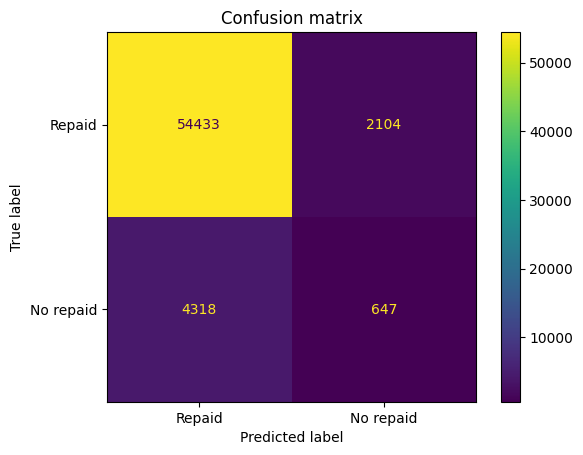

In [124]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

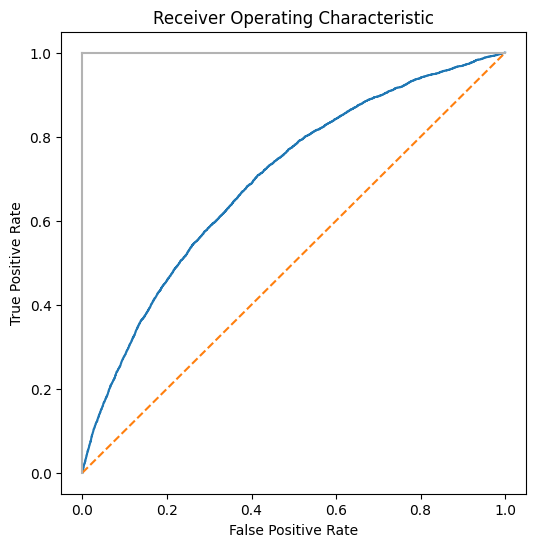

In [125]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

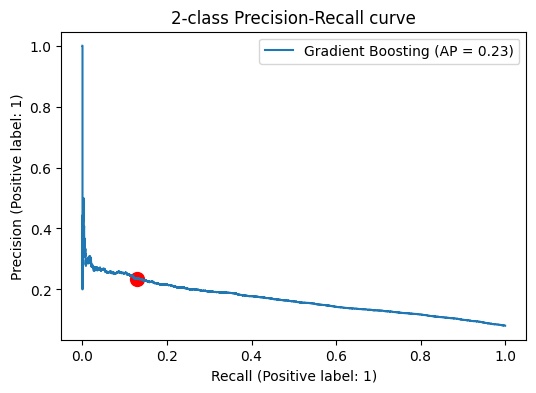

In [126]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4")
plt.scatter(recall_1_clf_gb_os, precision_clf_gb_os, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision_clf_gb_os)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [127]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling - Gradient Boosting"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_gb_os,    
    # "Recall - 0" : recall_0_clf_gb_os,
    "Precision - 1" : precision_clf_gb_os,
    "Recall - 1" : recall_1_clf_gb_os,
    "F1 - 1" : f1_clf_gb_os,    
    "Duration (min)" : round(end_time_model_clf_gb_os/60, 1)
})

In [128]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.5,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.5,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.5,0.698,0.235,0.130,0.168,79.2


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Modelisation using UnderSampling</h2>
</div>

<div class="alert alert-block alert-info">
    <p>To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.</p>
</div>

In [129]:
undersample = RandomUnderSampler(sampling_strategy='majority')

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.1. Random Forest</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [130]:
clf_rf_us = imbpipeline(steps = [["UnderSample", undersample],
                                 ["Random_Forest", RandomForestClassifier(**rf_parameters,
                                                                          random_state=42,
                                                                          n_jobs=-1)]
                                 ]
                        )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [131]:
%%time
if FIT_MODE_RF_US:
    start_time_model = timeit.default_timer()
    
    clf_rf_us.fit(X_train_fs, y_train)
    
    end_time_model_clf_rf_us =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_rf_us, open(CLF_RF_US_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_rf_us, open(DURATION_MODEL_CLF_RF_US, 'wb'))
else:
    clf_rf_us = pickle.load(open(CLF_RF_US_FILENAME, 'rb'))
    end_time_model_clf_rf_us = pickle.load(open(DURATION_MODEL_CLF_RF_US, 'rb'))

CPU times: total: 469 ms
Wall time: 518 ms


<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [132]:
y_pred =clf_rf_us.predict(X_test_fs)
y_prob = clf_rf_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [133]:
roc_auc_clf_rf_us = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_rf_us, recall_1_clf_rf_us = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_us = round(f1_score(y_test, y_pred), 3)
precision_clf_rf_us = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

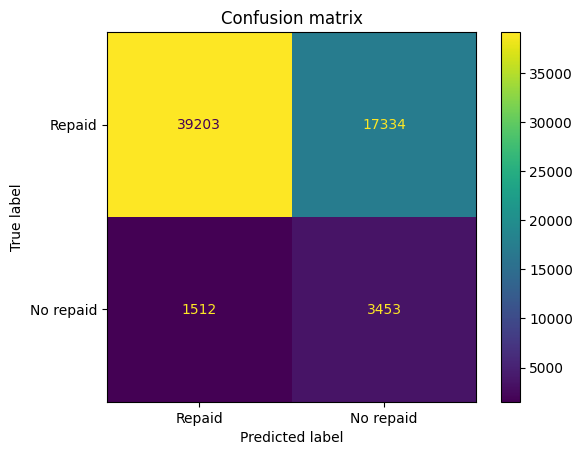

In [134]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

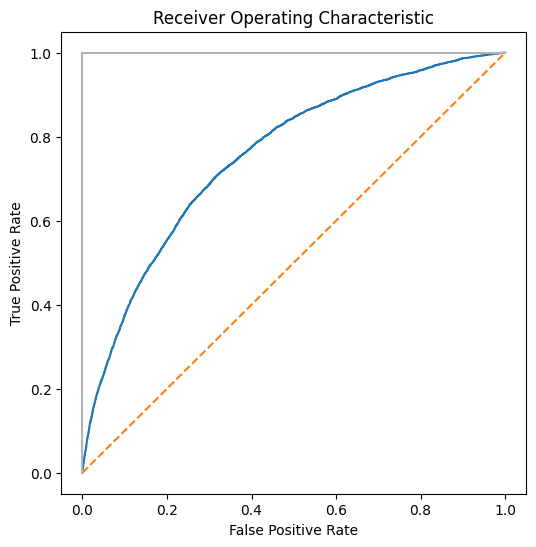

In [135]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

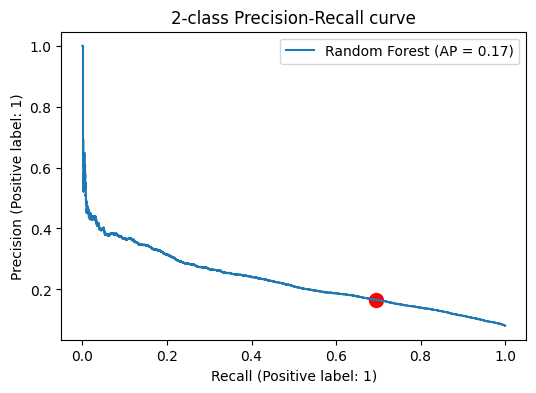

In [136]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_rf_us, precision_clf_rf_us, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision_clf_rf_us)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [137]:
df_temp = pd.DataFrame({
    "Model" : ["UnderSampling - Random Forest"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_rf_us,    
    # "Recall - 0" : recall_0_clf_rf_us,
    "Precision - 1" : precision_clf_rf_us,
    "Recall - 1" : recall_1_clf_rf_us,    
    "F1 - 1" : f1_clf_rf_us,    
    "Duration (min)" : round(end_time_model_clf_rf_us/60, 1)
})

In [138]:
df_temp

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,UnderSampling - Random Forest,0.5,0.756,0.166,0.695,0.268,4.8


In [139]:
# %%time
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(clf_rf_us, X_test_fs, y_test, scoring='f1_micro', cv=cv, n_jobs=-1)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)

In [140]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.5,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.5,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.5,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.5,0.756,0.166,0.695,0.268,4.8


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.2. LightGBM</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [141]:
clf_lgbm_us = imbpipeline(steps = [["UnderSample", undersample],
                                   ["LightGBM", LGBMClassifier(**lgbm_parameters, learning_rate=0.02,
                                                                    colsample_bytree=0.9497036, subsample=0.8715623,
                                                                    reg_alpha=0.041545473, reg_lambda=0.0735294,
                                                                    min_split_gain=0.0222415, min_child_weight=39.3259775,
                                                                    random_state=42, n_jobs=-1)]
                                   ]
                          )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [142]:
%%time
if FIT_MODE_lgbm_US:
    start_time_model = timeit.default_timer()
    
    clf_lgbm_us.fit(X_train_fs, y_train, LightGBM__callbacks=[early_stopping(stopping_rounds=50)], LightGBM__eval_set=[(X_test_fs, y_test)])
    
    end_time_model_clf_lgbm_us =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_lgbm_us, open(CLF_lgbm_US_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_lgbm_us, open(DURATION_MODEL_CLF_lgbm_US, 'wb'))
else:
    clf_lgbm_us = pickle.load(open(CLF_lgbm_US_FILENAME, 'rb'))
    end_time_model_clf_lgbm_us = pickle.load(open(DURATION_MODEL_CLF_lgbm_US, 'rb'))

CPU times: total: 156 ms
Wall time: 22 ms


<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [143]:
y_pred = clf_lgbm_us.predict(X_test_fs)
y_prob = clf_lgbm_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [144]:
roc_auc_clf_lgbm_us = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_lgbm_us, recall_1_clf_lgbm_us = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_us = round(f1_score(y_test, y_pred), 3)
precision_clf_lgbm_us = round(precision_score(y_test, y_pred), 3)
print(f"roc_auc_clf_lgbm_us: {roc_auc_clf_lgbm_us}")
print(f"recall_1_clf_lgbm_us: {recall_1_clf_lgbm_us}")
print(f"f1_clf_lgbm_us: {f1_clf_lgbm_us}")
print(f"precision_clf_lgbm_us: {precision_clf_lgbm_us}")

roc_auc_clf_lgbm_us: 0.777
recall_1_clf_lgbm_us: 0.712
f1_clf_lgbm_us: 0.281
precision_clf_lgbm_us: 0.175


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

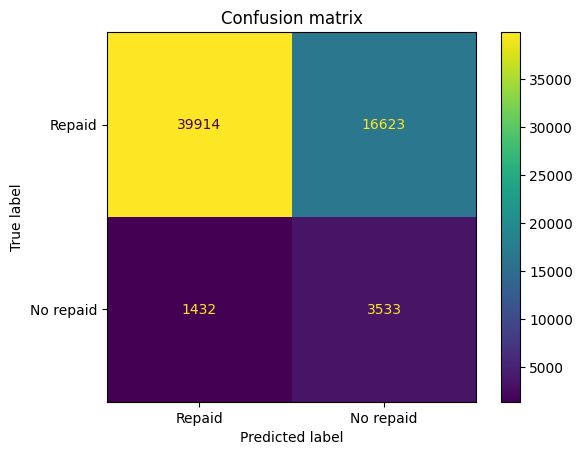

In [145]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

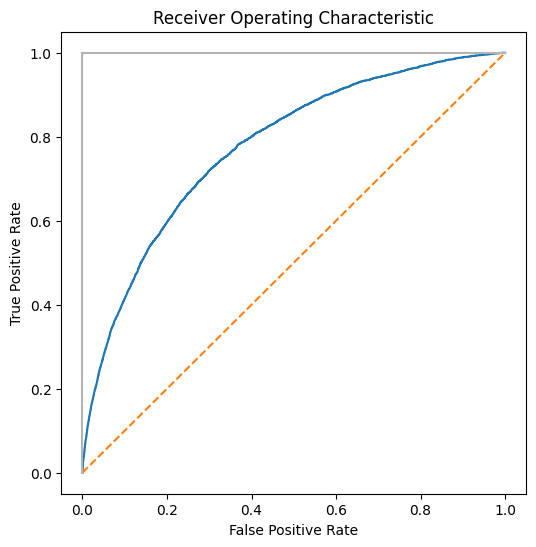

In [146]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

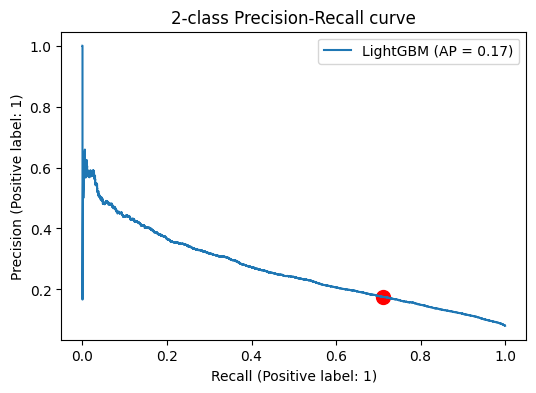

In [147]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1_clf_lgbm_us, precision_clf_lgbm_us, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision_clf_lgbm_us)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [148]:
df_temp = pd.DataFrame({
    "Model" : ["UnderSampling - LightGBM"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_lgbm_us,    
    # "Recall - 0" : recall_0_clf_lgbm_us,
    "Precision - 1" : precision_clf_lgbm_us,
    "Recall - 1" : recall_1_clf_lgbm_us,    
    "F1 - 1" : f1_clf_lgbm_us,    
    "Duration (min)" : round(end_time_model_clf_lgbm_us/60, 1)
})

In [149]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.5,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.5,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.5,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.5,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.5,0.777,0.175,0.712,0.281,0.2


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.3. Gradient Boosting</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Let's define the pipeline to put inside it the defined SMOTE</p>
</div>

In [150]:
clf_gb_us = imbpipeline(steps = [["UnderSample", undersample],
                                 ["Gradient Boosting", GradientBoostingClassifier(**gb_parameters,
                                                                                  validation_fraction=0.2, 
                                                                                  n_iter_no_change=5,
                                                                                  tol=0.01, random_state=42)]
                                ]
                       )

<div class="alert alert-block alert-info">
    <p>Executing the model after making the OverSampling</p>
</div>

In [151]:
%%time
if FIT_MODE_gb_US:
    start_time_model = timeit.default_timer()
    
    clf_gb_us.fit(X_train_fs, y_train)
    
    end_time_model_clf_gb_us =  round(timeit.default_timer() - start_time_model, 3)
    pickle.dump(clf_gb_us, open(CLF_gb_US_FILENAME, 'wb'))
    pickle.dump(end_time_model_clf_gb_us, open(DURATION_MODEL_CLF_gb_US, 'wb'))
else:
    clf_gb_us = pickle.load(open(CLF_gb_US_FILENAME, 'rb'))
    end_time_model_clf_gb_us = pickle.load(open(DURATION_MODEL_CLF_gb_US, 'rb'))

CPU times: total: 15.6 ms
Wall time: 10 ms


<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [152]:
y_pred = clf_gb_us.predict(X_test_fs)
y_prob = clf_gb_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

In [153]:
roc_auc_clf_gb_us = round(roc_auc_score(y_test, y_prob), 3)
recall_0_clf_gb_us, recall_1_clf_gb_us = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_us = round(f1_score(y_test, y_pred), 3)
precision_clf_gb_us = round(precision_score(y_test, y_pred), 3)

In [154]:
%%time
# scores_clf_gb_us = evaluate_model(X_test_fs, y_test, clf_gb_us)
# print('%.3f (%.3f)' % (mean(scores_clf_gb_us), std(scores_clf_gb_us)))

CPU times: total: 0 ns
Wall time: 0 ns


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

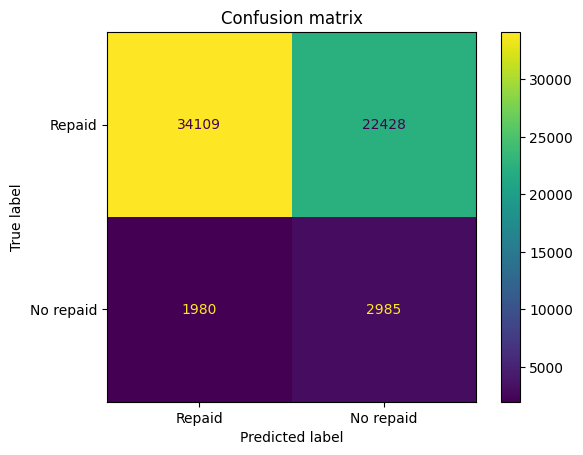

In [155]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

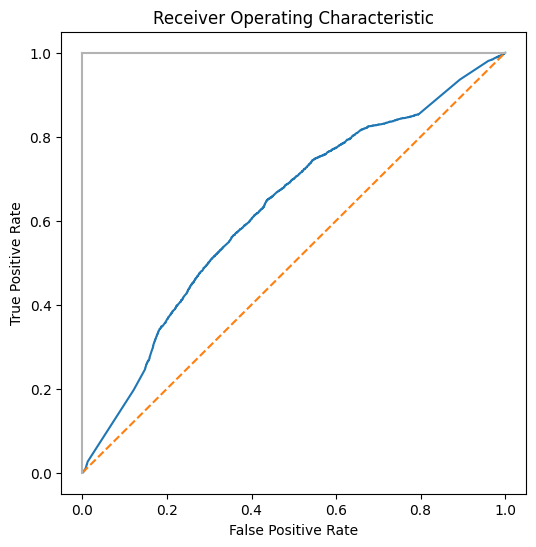

In [156]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

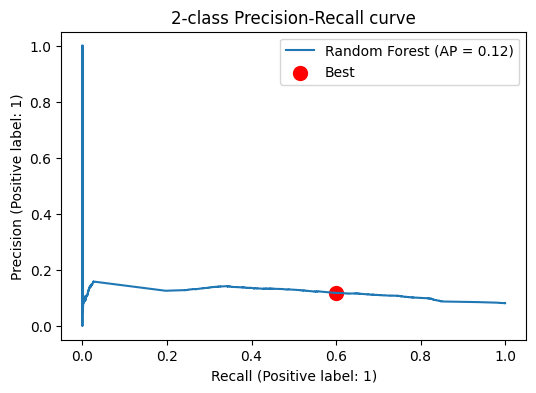

In [157]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_gb_us))
plt.scatter(recall_1_clf_gb_us, precision_clf_gb_us, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [158]:
df_temp = pd.DataFrame({
    "Model" : ["UnderSampling - Gradient Boosting"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc_clf_gb_us,    
    # "Recall - 0" : recall_0_clf_gb_us,
    "Precision - 1" : precision_clf_gb_us,
    "Recall - 1" : recall_1_clf_gb_us,
    "F1 - 1" : f1_clf_gb_us,    
    "Duration (min)" : round(end_time_model_clf_gb_us/60, 1)
})

In [159]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.5,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.5,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.5,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.5,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.5,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.5,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.5,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.5,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.5,0.625,0.117,0.601,0.197,0.7


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">11. Modelisation Threshold-Moving</h2>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.1. Threshold selection</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Based on the <b>probability predictions</b>, we are going to identify the best treshold to mesure our models.
    </p>
</div>

In [160]:
def threshold_selection(y_test, y_prob, metrics=f1_score, print_results=False):
    """
    Method used to calculate the threshold based on the Custom Score.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        y_test (1d array-like): True values
        y_prob (1d array-like): Probabilite values predicted
        
    Returns:
    -----------------
        threshold (float) : Best threshold value
        Threshold (image) : Plot the threshold and the best score
    """
    
    thresholds = np.arange(0, 1, 0.001)
    scores = []
    y_preds = []
    
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype("int")
        if metrics=='average_precision_score':
            score = average_precision_score(y_test, y_pred, average='weighted')
        else:
            score = metrics(y_test, y_pred)
        scores.append(score)
        y_preds.append(y_pred)
        
    scores = np.asarray(scores)
    ix = np.argmax(scores)
    
    best_y_pred, best_threshold, best_score = (y_preds[ix], round(thresholds[ix],3), round(scores[ix], 3))

    if print_results:
        print("Best results")
        print("- Best Threshold:\t", best_threshold)
        print("- Best Score:\t\t", best_score)
        print("\n")
    
    plt.subplots(1, figsize=(6, 5))
    plt.plot(thresholds, scores, lw=1)
    plt.axvline(best_threshold, ls="--", lw=1, c="r")
    plt.title("Threshold")
    plt.xlabel("proba threshold")
    plt.ylabel("Score performed")
    plt.show()
    
    return best_threshold , best_y_pred

<div class="alert alert-block alert-info">
    <p>To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.</p>
</div>

In [161]:
# undersample = RandomUnderSampler(sampling_strategy='majority')

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.1. Random Forest</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.1.1. Random Forest with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [162]:
y_prob = clf_rf_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

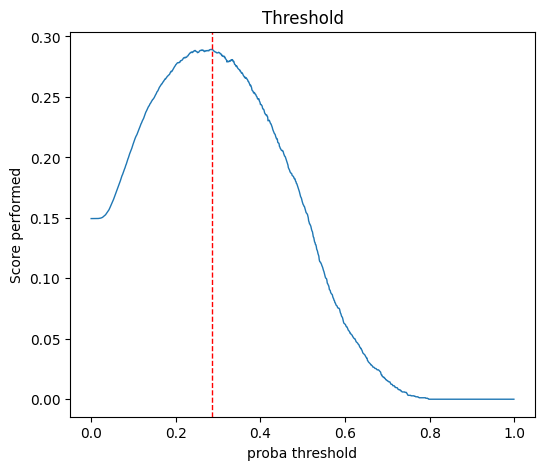

In [167]:
threshold_clf_rf_cw_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [168]:
roc_auc_clf_rf_cw_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_cw_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_cw_tm, recall_1_clf_rf_cw_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_cw_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_cw_tm:':<30}{threshold_clf_rf_cw_tm}")
print(f"{'roc_auc_clf_rf_cw_tm:':<30}{roc_auc_clf_rf_cw_tm}")
print(f"{'precision_clf_rf_cw_tm:':<30}{precision_clf_rf_cw_tm}")
print(f"{'recall_1_clf_rf_cw_tm:':<30}{recall_1_clf_rf_cw_tm}")
print(f"{'f1_clf_rf_cw_tm:':<30}{f1_clf_rf_cw_tm}")

threshold_clf_rf_cw_tm:       0.286
roc_auc_clf_rf_cw_tm:         0.748
precision_clf_rf_cw_tm:       0.225
recall_1_clf_rf_cw_tm:        0.405
f1_clf_rf_cw_tm:              0.289


<div class="alert alert-block alert-info">
    <p>Let's select the threshold custom score based on the best parameters </p>
</div>

Best results
- Best Threshold:	 0.286
- Best Score:		 0.152




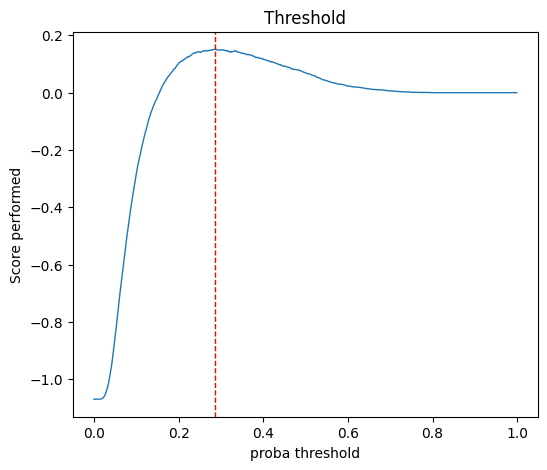

In [169]:
threshold_clf_rf_cw_tm_cs, y_pred_cs = threshold_selection(y_test, y_prob, metrics=custom_score, print_results=True)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics for custom_score</p>
</div>

In [170]:
roc_auc_clf_rf_cw_tm_cs = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_cw_tm_cs = round(precision_score(y_test, y_pred_cs), 3)
recall_0_clf_rf_cw_tm_cs, recall_1_clf_rf_cw_tm_cs = recall_score(y_test, y_pred_cs, average=None).round(3)
f1_clf_rf_cw_tm_cs = round(f1_score(y_test, y_pred_cs), 3)
print(f"{'threshold_clf_rf_cw_tm_cs:':<30}{threshold_clf_rf_cw_tm_cs}")
print(f"{'roc_auc_clf_rf_cw_tm_cs:':<30}{roc_auc_clf_rf_cw_tm_cs}")
print(f"{'precision_clf_rf_cw_tm_cs:':<30}{precision_clf_rf_cw_tm_cs}")
print(f"{'recall_1_clf_rf_cw_tm_cs:':<30}{recall_1_clf_rf_cw_tm_cs}")
print(f"{'f1_clf_rf_cw_tm_cs:':<30}{f1_clf_rf_cw_tm_cs}")

threshold_clf_rf_cw_tm_cs:    0.286
roc_auc_clf_rf_cw_tm_cs:      0.748
precision_clf_rf_cw_tm_cs:    0.225
recall_1_clf_rf_cw_tm_cs:     0.405
f1_clf_rf_cw_tm_cs:           0.289


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

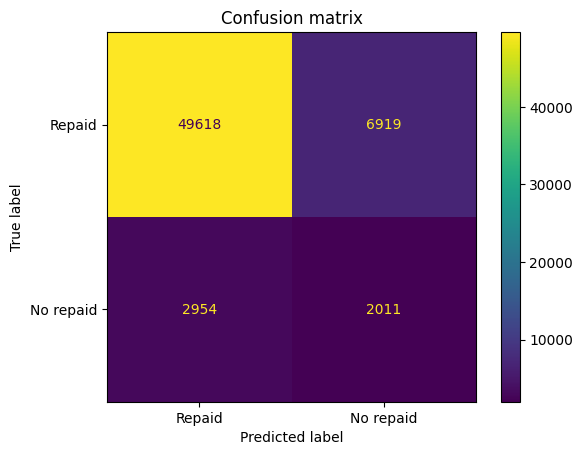

In [171]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

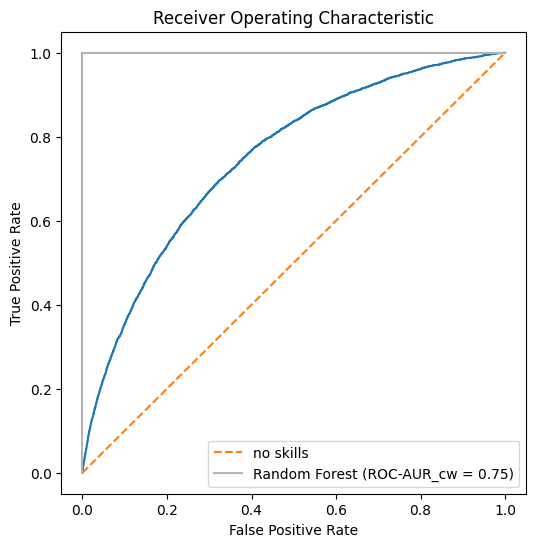

In [172]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="Random Forest (ROC-AUR_cw = %.2f)"% (roc_auc_clf_rf_cw_tm)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

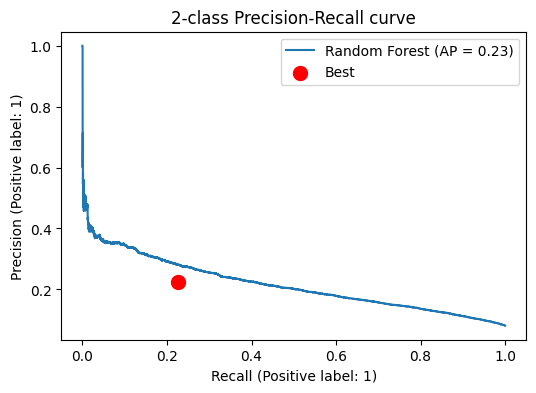

In [173]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_cw_tm));
plt.scatter(precision_clf_rf_cw_tm, precision_clf_rf_cw_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [174]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Class weight - Random Forest"],
    "Threshold" : threshold_clf_rf_cw_tm,
    "ROC-AUC" : roc_auc_clf_rf_cw_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_cw_tm,
    "Recall - 1" : recall_1_clf_rf_cw_tm,
    "F1 - 1" : f1_clf_rf_cw_tm,    
    "Duration (min)" : round(end_time_model_clf_rf_cw/60, 1)
})

In [175]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.1.2. Random Forest with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [176]:
y_prob = clf_rf_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

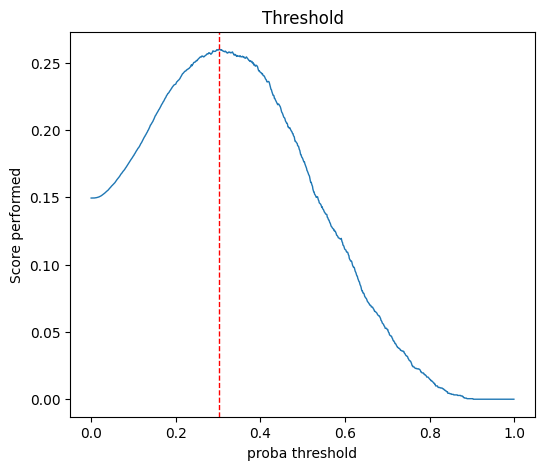

In [177]:
threshold_clf_rf_os_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [178]:
roc_auc_clf_rf_os_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_os_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_os_tm, recall_1_clf_rf_os_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_os_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_os_tm:':<30}{threshold_clf_rf_os_tm}")
print(f"{'roc_auc_clf_rf_os_tm:':<30}{roc_auc_clf_rf_os_tm}")
print(f"{'precision_clf_rf_os_tm:':<30}{precision_clf_rf_os_tm}")
print(f"{'recall_1_clf_rf_os_tm:':<30}{recall_1_clf_rf_os_tm}")
print(f"{'f1_clf_rf_os_tm:':<30}{f1_clf_rf_os_tm}")

threshold_clf_rf_os_tm:       0.303
roc_auc_clf_rf_os_tm:         0.72
precision_clf_rf_os_tm:       0.181
recall_1_clf_rf_os_tm:        0.462
f1_clf_rf_os_tm:              0.26


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

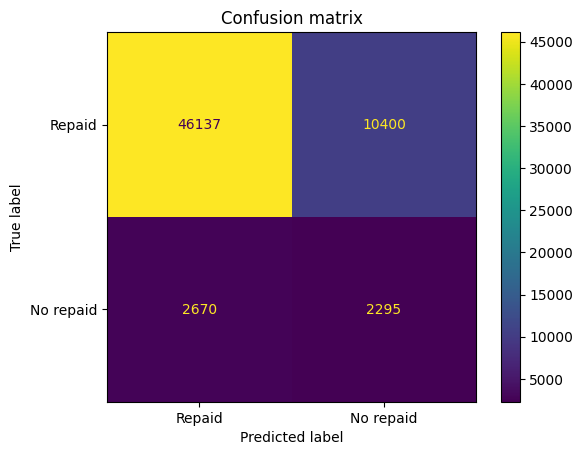

In [179]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

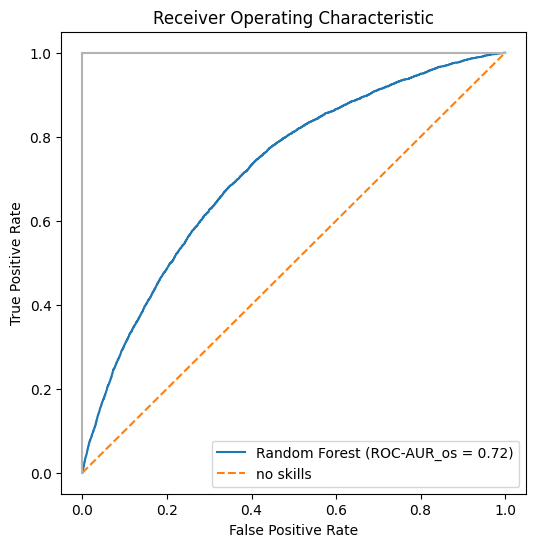

In [180]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="Random Forest (ROC-AUR_os = %.2f)"% (roc_auc_clf_rf_os_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

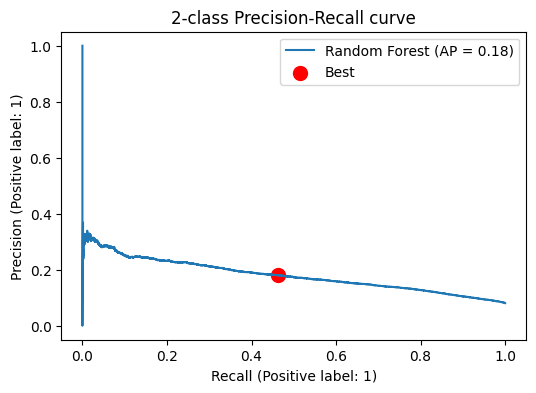

In [181]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_os_tm));
plt.scatter(recall_1_clf_rf_os_tm, precision_clf_rf_os_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [182]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - OverSampling - Random Forest"],
    "Threshold" : threshold_clf_rf_os_tm,
    "ROC-AUC" : roc_auc_clf_rf_os_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_os_tm,
    "Recall - 1" : recall_1_clf_rf_os_tm,
    "F1 - 1" : f1_clf_rf_os_tm,    
    "Duration (min)" : round(end_time_model_clf_rf_os/60, 1)
})

In [183]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.1.3. Random Forest with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [184]:
y_prob = clf_rf_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

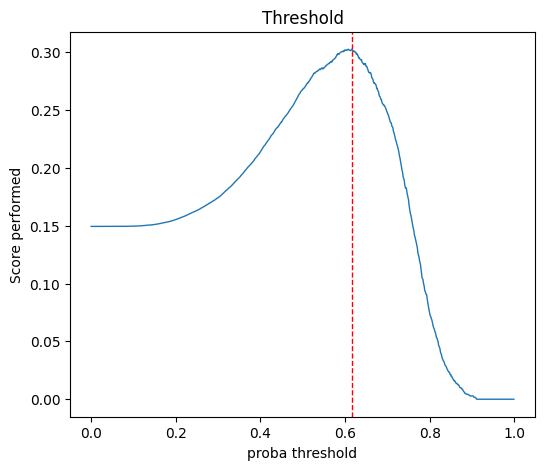

In [185]:
threshold_clf_rf_us_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [186]:
roc_auc_clf_rf_us_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_rf_us_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_rf_us_tm, recall_1_clf_rf_us_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_rf_us_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_rf_us_tm:':<30}{threshold_clf_rf_us_tm}")
print(f"{'roc_auc_clf_rf_us_tm:':<30}{roc_auc_clf_rf_us_tm}")
print(f"{'precision_clf_rf_us_tm:':<30}{precision_clf_rf_us_tm}")
print(f"{'recall_1_clf_rf_us_tm:':<30}{recall_1_clf_rf_us_tm}")
print(f"{'f1_clf_rf_us_tm:':<30}{f1_clf_rf_us_tm}")

threshold_clf_rf_us_tm:       0.616
roc_auc_clf_rf_us_tm:         0.756
precision_clf_rf_us_tm:       0.239
recall_1_clf_rf_us_tm:        0.411
f1_clf_rf_us_tm:              0.303


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

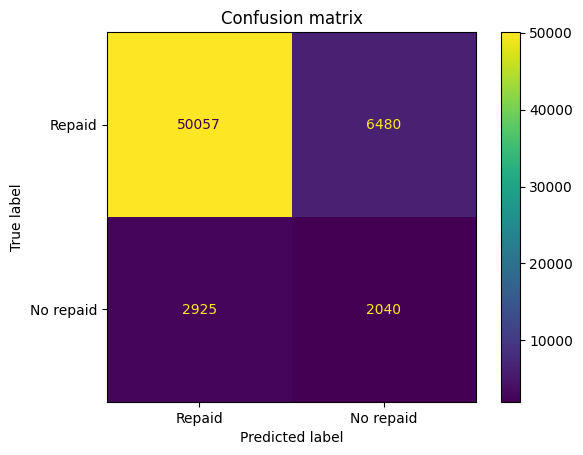

In [187]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

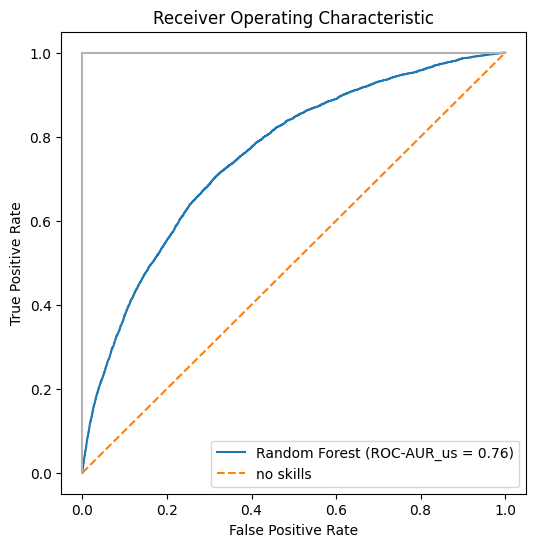

In [188]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="Random Forest (ROC-AUR_us = %.2f)"% (roc_auc_clf_rf_us_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

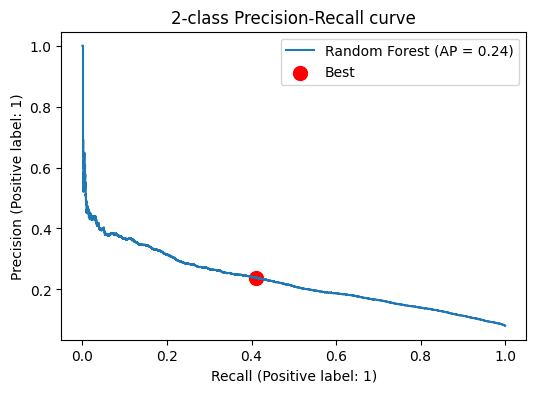

In [189]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Random Forest (AP = %.2f)"% (precision_clf_rf_us_tm));
plt.scatter(recall_1_clf_rf_us_tm, precision_clf_rf_us_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [190]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Undersampling - Random Forest"],
    "Threshold" : threshold_clf_rf_us_tm,
    "ROC-AUC" : roc_auc_clf_rf_us_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_rf_us_tm,
    "Recall - 1" : recall_1_clf_rf_us_tm,
    "F1 - 1" : f1_clf_rf_us_tm,    
    "Duration (min)" : round(end_time_model_clf_rf_us/60, 1)
})

In [191]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.2. LightGBM</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.2.1. LightGBM with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [192]:
y_prob = clf_lgbm_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

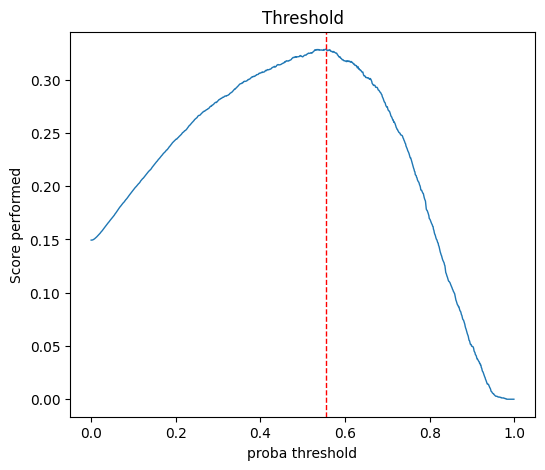

In [193]:
threshold_clf_lgbm_cw_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [194]:
roc_auc_clf_lgbm_cw_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_cw_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_cw_tm, recall_1_clf_lgbm_cw_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_cw_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_cw_tm:':<30}{threshold_clf_lgbm_cw_tm}")
print(f"{'roc_auc_clf_lgbm_cw_tm:':<30}{roc_auc_clf_lgbm_cw_tm}")
print(f"{'precision_clf_lgbm_cw_tm:':<30}{precision_clf_lgbm_cw_tm}")
print(f"{'recall_1_clf_lgbm_cw_tm:':<30}{recall_1_clf_lgbm_cw_tm}")
print(f"{'f1_clf_lgbm_cw_tm:':<30}{f1_clf_lgbm_cw_tm}")

threshold_clf_lgbm_cw_tm:     0.554
roc_auc_clf_lgbm_cw_tm:       0.767
precision_clf_lgbm_cw_tm:     0.284
recall_1_clf_lgbm_cw_tm:      0.39
f1_clf_lgbm_cw_tm:            0.329


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

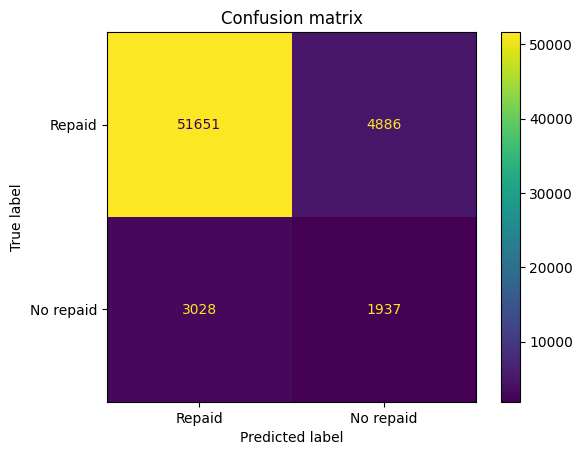

In [195]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

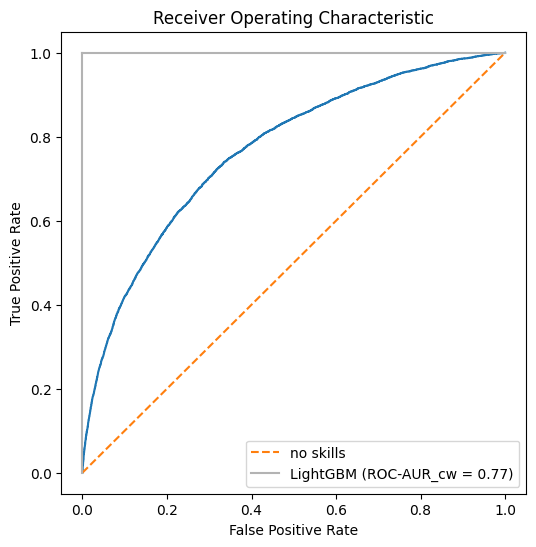

In [196]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="LightGBM (ROC-AUR_cw = %.2f)"% (roc_auc_clf_lgbm_cw_tm)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

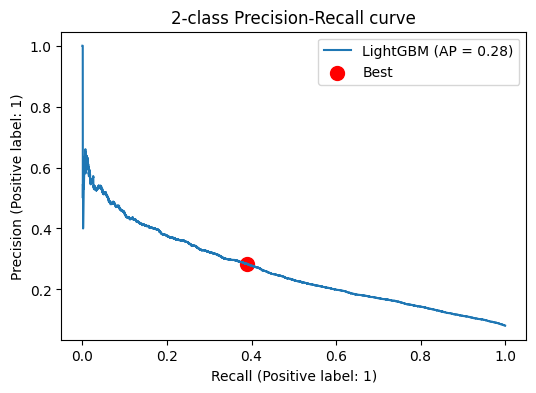

In [197]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_cw_tm));
plt.scatter(recall_1_clf_lgbm_cw_tm, precision_clf_lgbm_cw_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [198]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Class weight - LightGBM"],
    "Threshold" : threshold_clf_lgbm_cw_tm,
    "ROC-AUC" : roc_auc_clf_lgbm_cw_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_cw_tm,
    "Recall - 1" : recall_1_clf_lgbm_cw_tm,
    "F1 - 1" : f1_clf_lgbm_cw_tm,    
    "Duration (min)" : round(end_time_model_clf_lgbm_cw/60, 1)
})

In [199]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.2.2. LightGBM with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [200]:
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

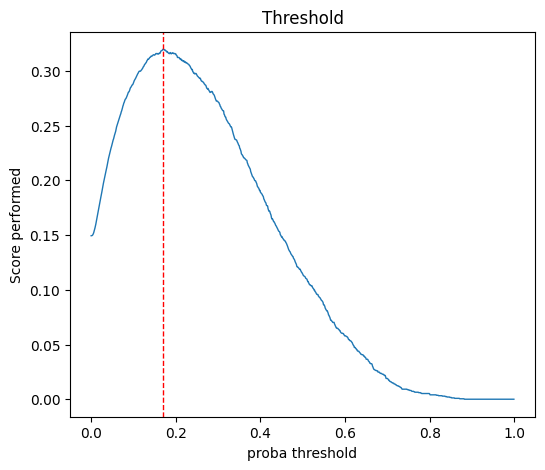

In [201]:
threshold_clf_lgbm_os_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [202]:
roc_auc_clf_lgbm_os_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_os_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_os_tm, recall_1_clf_lgbm_os_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_os_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_os_tm:':<30}{threshold_clf_lgbm_os_tm}")
print(f"{'roc_auc_clf_lgbm_os_tm:':<30}{roc_auc_clf_lgbm_os_tm}")
print(f"{'precision_clf_lgbm_os_tm:':<30}{precision_clf_lgbm_os_tm}")
print(f"{'recall_1_clf_lgbm_os_tm:':<30}{recall_1_clf_lgbm_os_tm}")
print(f"{'f1_clf_lgbm_os_tm:':<30}{f1_clf_lgbm_os_tm}")

threshold_clf_lgbm_os_tm:     0.17
roc_auc_clf_lgbm_os_tm:       0.767
precision_clf_lgbm_os_tm:     0.25
recall_1_clf_lgbm_os_tm:      0.445
f1_clf_lgbm_os_tm:            0.32


<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters and score=f1_score</p>
</div>

In [203]:
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

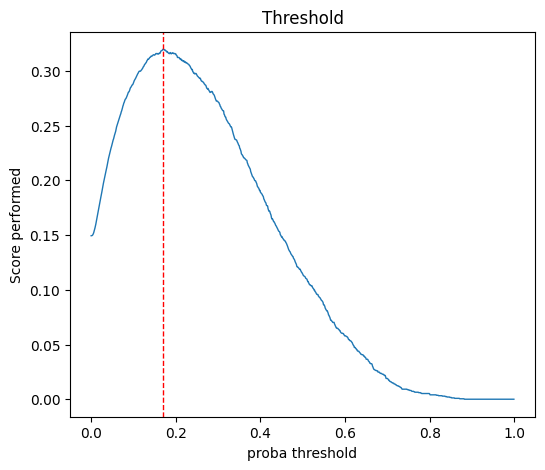

In [204]:
threshold_clf_lgbm_os_tm_f1, y_pred_f1 = threshold_selection(y_test, y_prob, metrics=f1_score)

In [205]:
roc_auc_clf_lgbm_os_tm_f1 = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_os_tm_f1 = round(precision_score(y_test, y_pred_f1), 3)
recall_0_clf_lgbm_os_tm_f1, recall_1_clf_lgbm_os_tm_f1 = recall_score(y_test, y_pred_f1, average=None).round(3)
f1_clf_lgbm_os_tm_f1 = round(f1_score(y_test, y_pred_f1), 3)
print(f"{'threshold_clf_lgbm_os_tm_f1:':<30}{threshold_clf_lgbm_os_tm_f1}")
print(f"{'roc_auc_clf_lgbm_os_tm_f1:':<30}{roc_auc_clf_lgbm_os_tm_f1}")
print(f"{'precision_clf_lgbm_os_tm_f1:':<30}{precision_clf_lgbm_os_tm_f1}")
print(f"{'recall_1_clf_lgbm_os_tm_f1:':<30}{recall_1_clf_lgbm_os_tm_f1}")
print(f"{'f1_clf_lgbm_os_tm_f1:':<30}{f1_clf_lgbm_os_tm_f1}")

threshold_clf_lgbm_os_tm_f1:  0.17
roc_auc_clf_lgbm_os_tm_f1:    0.767
precision_clf_lgbm_os_tm_f1:  0.25
recall_1_clf_lgbm_os_tm_f1:   0.445
f1_clf_lgbm_os_tm_f1:         0.32


<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters and score=average_precision_score</p>
</div>

In [206]:
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

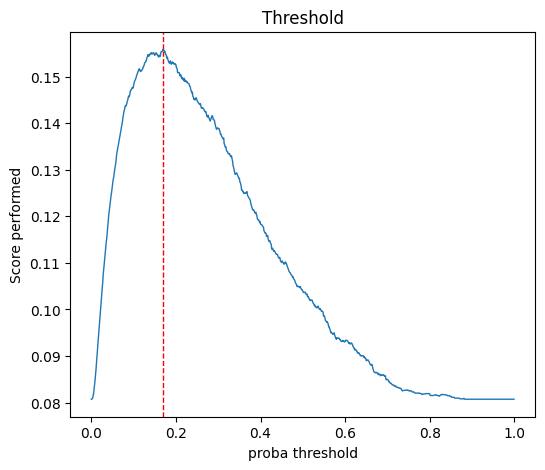

In [207]:
threshold_clf_lgbm_os_tm_ps, y_pred_ps = threshold_selection(y_test, y_prob, metrics=average_precision_score)

In [208]:
roc_auc_clf_lgbm_os_tm_ps = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_os_tm_ps = round(precision_score(y_test, y_pred_f1), 3)
recall_0_clf_lgbm_os_tm_ps, recall_1_clf_lgbm_os_tm_ps = recall_score(y_test, y_pred_f1, average=None).round(3)
f1_clf_lgbm_os_tm_ps = round(f1_score(y_test, y_pred_f1), 3)
print(f"{'threshold_clf_lgbm_os_tm_ps:':<30}{threshold_clf_lgbm_os_tm_ps}")
print(f"{'roc_auc_clf_lgbm_os_tm_ps:':<30}{roc_auc_clf_lgbm_os_tm_ps}")
print(f"{'precision_clf_lgbm_os_tm_ps:':<30}{precision_clf_lgbm_os_tm_ps}")
print(f"{'recall_1_clf_lgbm_os_tm_ps:':<30}{recall_1_clf_lgbm_os_tm_ps}")
print(f"{'f1_clf_lgbm_os_tm_ps:':<30}{f1_clf_lgbm_os_tm_ps}")

threshold_clf_lgbm_os_tm_ps:  0.17
roc_auc_clf_lgbm_os_tm_ps:    0.767
precision_clf_lgbm_os_tm_ps:  0.25
recall_1_clf_lgbm_os_tm_ps:   0.445
f1_clf_lgbm_os_tm_ps:         0.32


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

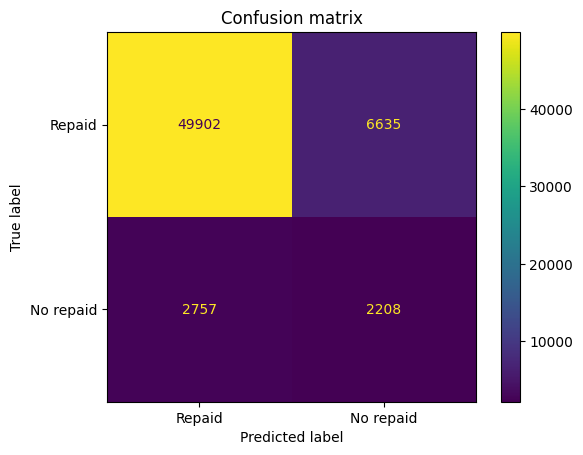

In [209]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

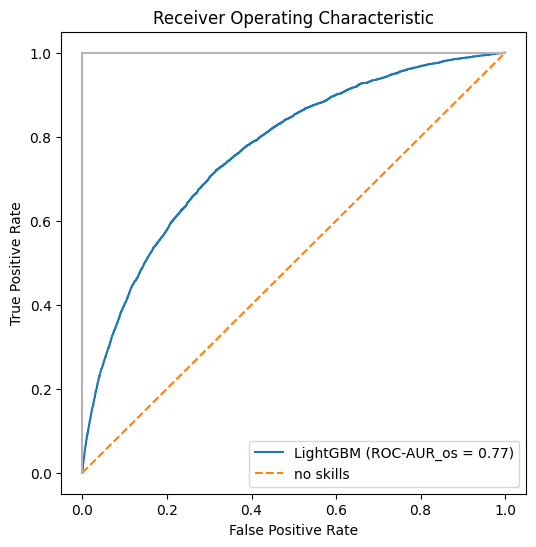

In [210]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_lgbm_os_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

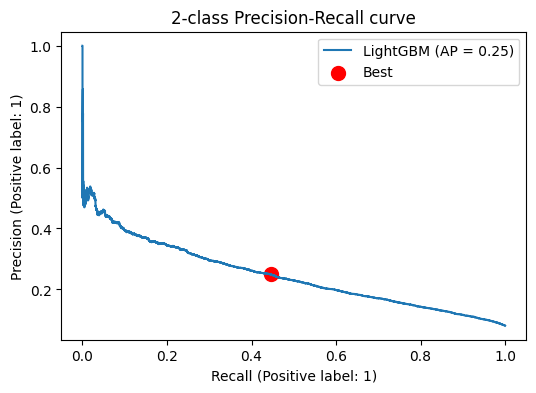

In [211]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_os_tm));
plt.scatter(recall_1_clf_lgbm_os_tm, precision_clf_lgbm_os_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [212]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - OverSampling - LightGBM"],
    "Threshold" : threshold_clf_lgbm_os_tm,
    "ROC-AUC" : roc_auc_clf_lgbm_os_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_os_tm,
    "Recall - 1" : recall_1_clf_lgbm_os_tm,
    "F1 - 1" : f1_clf_lgbm_os_tm,    
    "Duration (min)" : round(end_time_model_clf_lgbm_os/60, 1)
})

In [213]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.2.3. LightGBM with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [214]:
y_prob = clf_lgbm_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

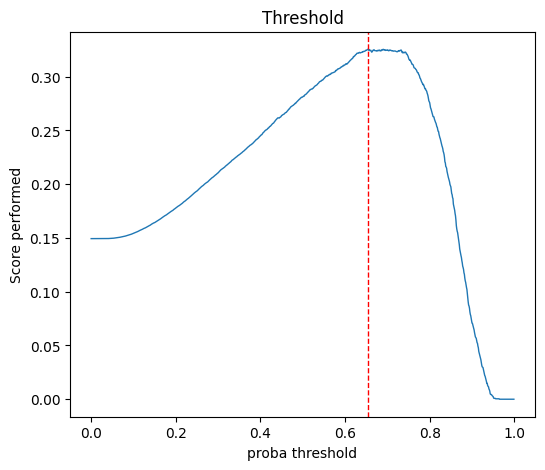

In [215]:
threshold_clf_lgbm_us_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [216]:
roc_auc_clf_lgbm_us_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_lgbm_us_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_lgbm_us_tm, recall_1_clf_lgbm_us_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_lgbm_us_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_us_tm:':<30}{threshold_clf_lgbm_us_tm}")
print(f"{'roc_auc_clf_lgbm_us_tm:':<30}{roc_auc_clf_lgbm_us_tm}")
print(f"{'precision_clf_lgbm_us_tm:':<30}{precision_clf_lgbm_us_tm}")
print(f"{'recall_1_clf_lgbm_us_tm:':<30}{recall_1_clf_lgbm_us_tm}")
print(f"{'f1_clf_lgbm_us_tm:':<30}{f1_clf_lgbm_us_tm}")

threshold_clf_lgbm_us_tm:     0.654
roc_auc_clf_lgbm_us_tm:       0.777
precision_clf_lgbm_us_tm:     0.242
recall_1_clf_lgbm_us_tm:      0.498
f1_clf_lgbm_us_tm:            0.326


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

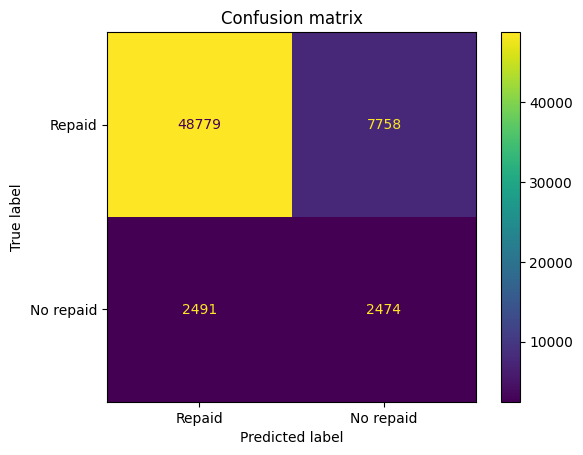

In [217]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

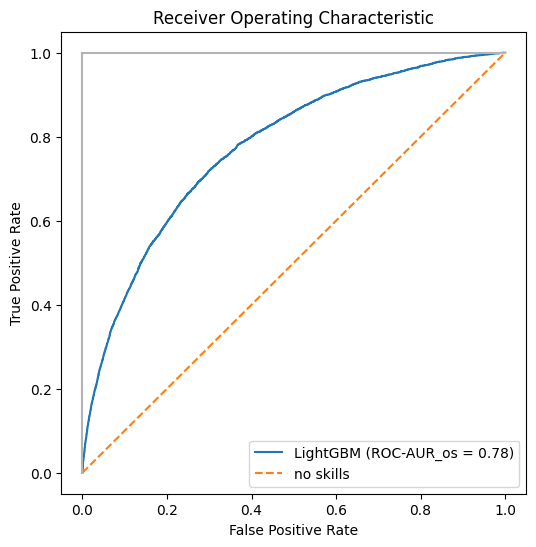

In [218]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_lgbm_us_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

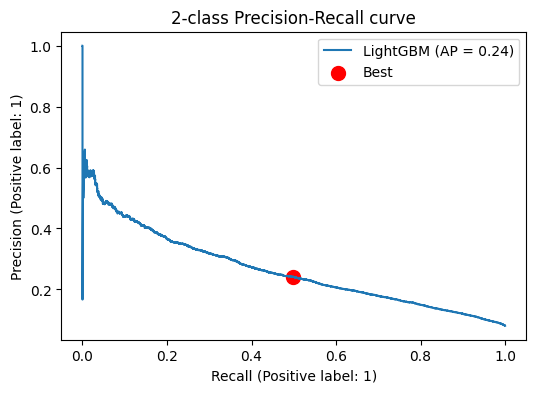

In [219]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_lgbm_us_tm));
plt.scatter(recall_1_clf_lgbm_us_tm, precision_clf_lgbm_us_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [220]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Undersampling - LightGBM"],
    "Threshold" : threshold_clf_lgbm_us_tm,
    "ROC-AUC" : roc_auc_clf_lgbm_us_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_lgbm_us_tm,
    "Recall - 1" : recall_1_clf_lgbm_us_tm,
    "F1 - 1" : f1_clf_lgbm_us_tm,    
    "Duration (min)" : round(end_time_model_clf_lgbm_us/60, 1)
})

In [221]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>All models have improved the Recall - 1</li>
        <li>OverSampling - Gradient Boosting has taken a lot of time</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.3. Gradient Boosting</h3>
</div>

<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.3.1. Gradient Boosting with class_weight balanced</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [222]:
y_prob = clf_gb_cw.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

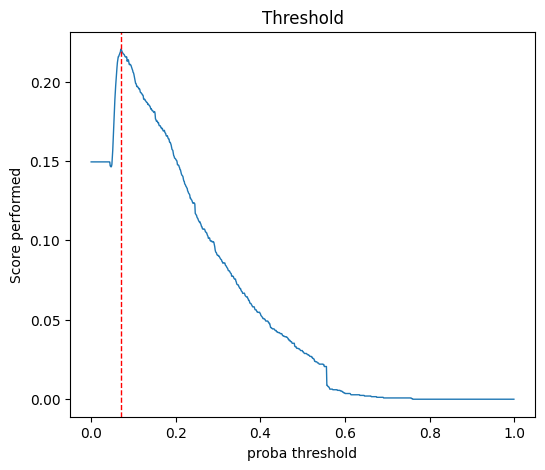

In [223]:
threshold_clf_gb_cw_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [224]:
roc_auc_clf_gb_cw_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_cw_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_cw_tm, recall_1_clf_gb_cw_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_cw_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_gb_cw_tm:':<30}{threshold_clf_gb_cw_tm}")
print(f"{'roc_auc_clf_gb_cw_tm:':<30}{roc_auc_clf_gb_cw_tm}")
print(f"{'precision_clf_lgbm_cw_tm:':<30}{precision_clf_lgbm_cw_tm}")
print(f"{'recall_1_clf_gb_cw_tm:':<30}{recall_1_clf_gb_cw_tm}")
print(f"{'f1_clf_gb_cw_tm:':<30}{f1_clf_gb_cw_tm}")

threshold_clf_gb_cw_tm:       0.07
roc_auc_clf_gb_cw_tm:         0.643
precision_clf_lgbm_cw_tm:     0.284
recall_1_clf_gb_cw_tm:        0.455
f1_clf_gb_cw_tm:              0.22


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

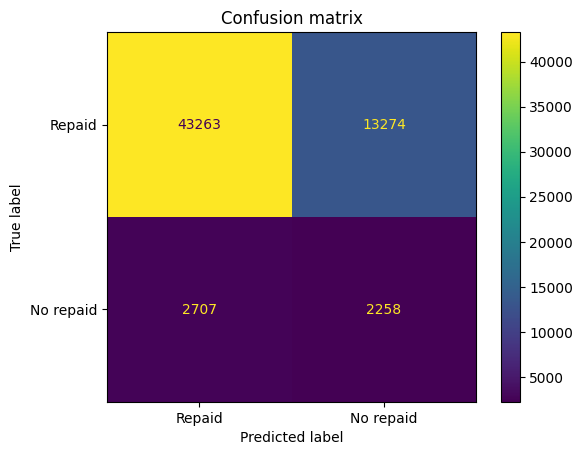

In [225]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

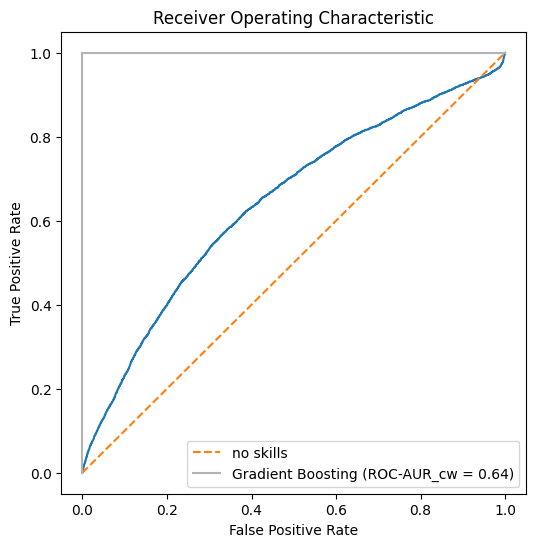

In [226]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--", label='no skills')
plt.plot([0, 0], [1, 0] , c=".7", label="Gradient Boosting (ROC-AUR_cw = %.2f)"% (roc_auc_clf_gb_cw_tm)), 
plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

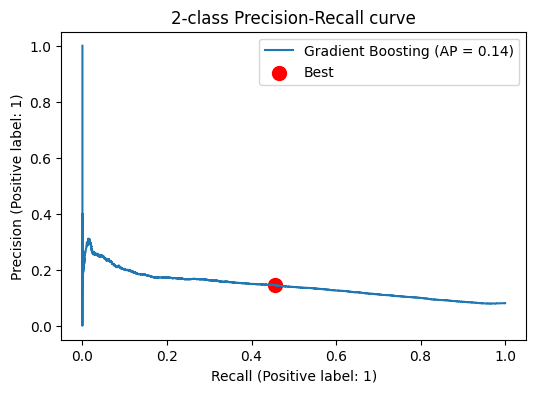

In [227]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="Gradient Boosting (AP = %.2f)"% (precision_clf_gb_cw_tm));
plt.scatter(recall_1_clf_gb_cw_tm, precision_clf_gb_cw_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [228]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Class weight - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_cw_tm,
    "ROC-AUC" : roc_auc_clf_gb_cw_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_cw_tm,
    "Recall - 1" : recall_1_clf_gb_cw_tm,
    "F1 - 1" : f1_clf_gb_cw_tm,    
    "Duration (min)" : round(end_time_model_clf_gb_cw/60, 1)
})

In [229]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.3.2. Gradient Boosting with OverSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [230]:
y_prob = clf_gb_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

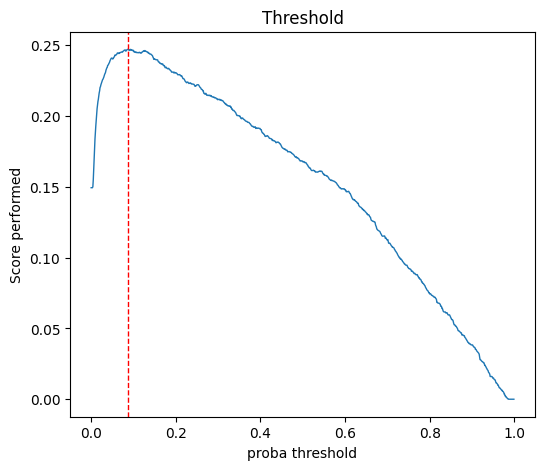

In [231]:
threshold_clf_gb_os_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [232]:
roc_auc_clf_gb_os_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_os_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_os_tm, recall_1_clf_gb_os_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_os_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'threshold_clf_lgbm_os_tm:':<30}{threshold_clf_lgbm_os_tm}")
print(f"{'roc_auc_clf_lgbm_os_tm:':<30}{roc_auc_clf_lgbm_os_tm}")
print(f"{'precision_clf_gb_os_tm:':<30}{precision_clf_gb_os_tm}")
print(f"{'recall_1_clf_lgbm_os_tm:':<30}{recall_1_clf_lgbm_os_tm}")
print(f"{'f1_clf_lgbm_os_tm:':<30}{f1_clf_lgbm_os_tm}")

threshold_clf_lgbm_os_tm:     0.17
roc_auc_clf_lgbm_os_tm:       0.767
precision_clf_gb_os_tm:       0.174
recall_1_clf_lgbm_os_tm:      0.445
f1_clf_lgbm_os_tm:            0.32


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

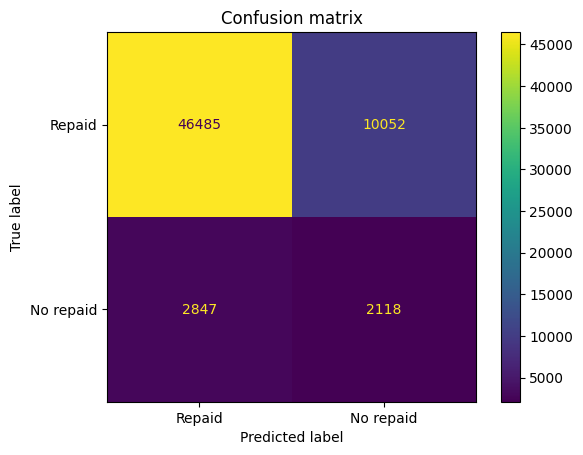

In [233]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

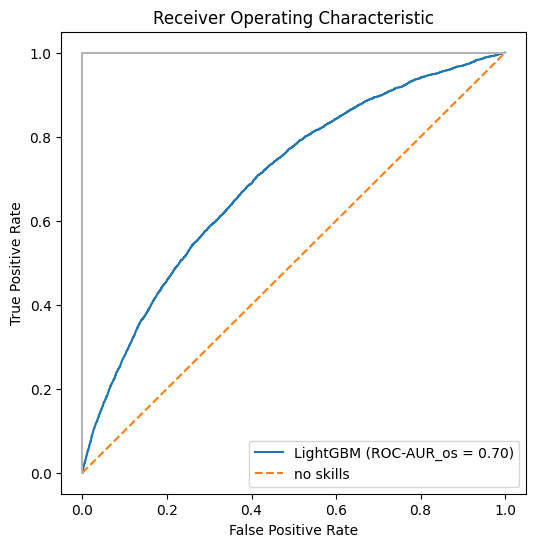

In [234]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_gb_os_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

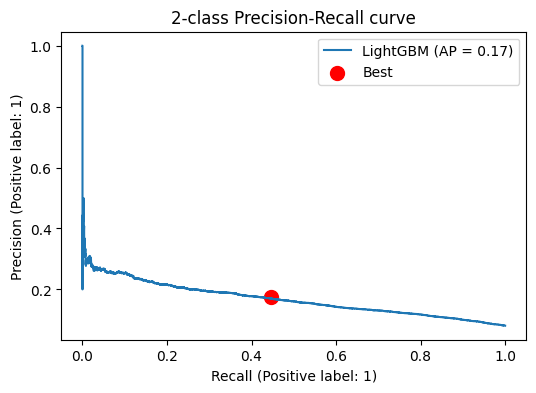

In [235]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision_clf_gb_os_tm));
plt.scatter(recall_1_clf_lgbm_os_tm, precision_clf_gb_os_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [236]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - OverSampling - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_os_tm,
    "ROC-AUC" : roc_auc_clf_gb_os_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_os_tm,
    "Recall - 1" : recall_1_clf_gb_os_tm,
    "F1 - 1" : f1_clf_gb_os_tm,    
    "Duration (min)" : round(end_time_model_clf_gb_os/60, 1)
})

In [237]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">11.3.3. Gradient Boosting with UnderSampling</h4>
</div>

<div class="alert alert-block alert-info">
    <p>Making the predictions</p>
</div>

In [238]:
y_prob = clf_gb_us.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's select the threshold based on the best parameters</p>
</div>

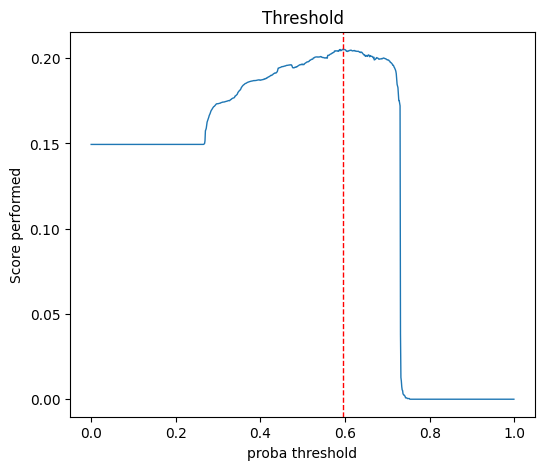

In [239]:
threshold_clf_gb_us_tm, y_pred = threshold_selection(y_test, y_prob, metrics=f1_score)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [241]:
roc_auc_clf_gb_us_tm = round(roc_auc_score(y_test, y_prob), 3)
precision_clf_gb_us_tm = round(precision_score(y_test, y_pred), 3)
recall_0_clf_gb_us_tm, recall_1_clf_gb_us_tm = recall_score(y_test, y_pred, average=None).round(3)
f1_clf_gb_us_tm = round(f1_score(y_test, y_pred), 3)
print(f"{'roc_auc_clf_gb_us_tm:':<30}{roc_auc_clf_gb_us_tm}")
print(f"{'precision_clf_gb_us_tm:':<30}{precision_clf_gb_us_tm}")
print(f"{'precision_clf_lgbm_us_tm:':<30}{precision_clf_gb_us_tm}")
print(f"{'recall_1_clf_gb_us_tm:':<30}{recall_1_clf_gb_us_tm}")
print(f"{'f1_clf_gb_us_tm:':<30}{f1_clf_gb_us_tm}")

roc_auc_clf_gb_us_tm:         0.625
precision_clf_gb_us_tm:       0.131
precision_clf_lgbm_us_tm:     0.131
recall_1_clf_gb_us_tm:        0.474
f1_clf_gb_us_tm:              0.205


<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

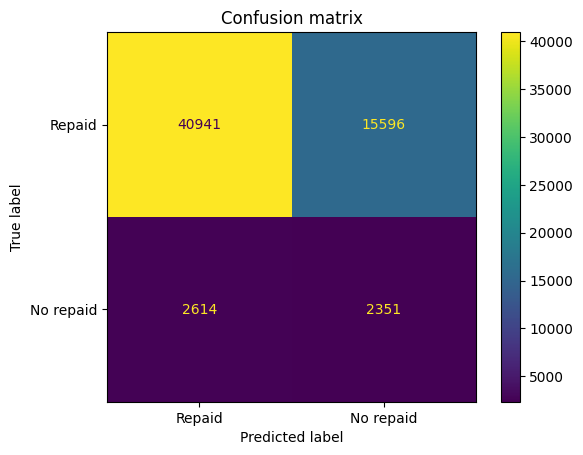

In [242]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

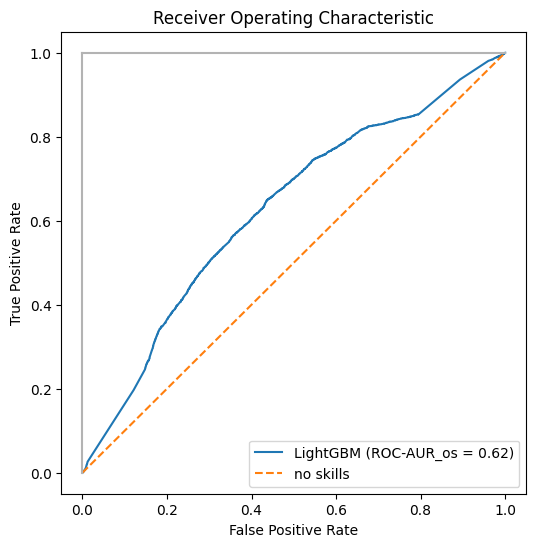

In [243]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"], label="LightGBM (ROC-AUR_os = %.2f)"% (roc_auc_clf_gb_us_tm))
plt.plot([0, 1], ls="--", label="no skills")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

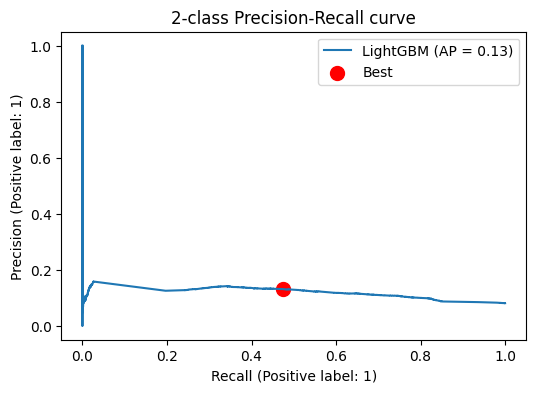

In [244]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4", label="LightGBM (AP = %.2f)"% (precision__clf_gb_us_tm));
plt.scatter(recall_1_clf_gb_us_tm, precision__clf_gb_us_tm, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [245]:
df_temp = pd.DataFrame({
    "Model" : ["Threshold-Moving - Undersampling - Gradient Boosting"],
    "Threshold" : threshold_clf_gb_us_tm,
    "ROC-AUC" : roc_auc_clf_gb_us_tm,    
    # "Recall - 0" : recall_0_clf_rf_tm,
    "Precision - 1" : precision_clf_gb_us_tm,
    "Recall - 1" : recall_1_clf_gb_us_tm,
    "F1 - 1" : f1_clf_gb_us_tm,    
    "Duration (min)" : round(end_time_model_clf_gb_us/60, 1)
})

In [246]:
df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True, inplace=True)
df_models_metrics_complete

,Model,Threshold,ROC-AUC,Precision - 1,Recall - 1,F1 - 1,Duration (min)
0,Class weight - Random Forest,0.500,0.748,0.340,0.107,0.162,3.6
1,Class weight - LightGBM,0.500,0.767,0.251,0.447,0.321,3.4
2,Tuned - Gradient Boosting,0.500,0.643,0.306,0.016,0.030,4.5
3,OverSampling - Random Forest,0.500,0.720,0.245,0.141,0.179,9.4
4,OverSampling - LightGBM,0.500,0.767,0.434,0.066,0.114,2.9
5,OverSampling - Gradient Boosting,0.500,0.698,0.235,0.130,0.168,79.2
6,UnderSampling - Random Forest,0.500,0.756,0.166,0.695,0.268,4.8
7,UnderSampling - LightGBM,0.500,0.777,0.175,0.712,0.281,0.2
8,UnderSampling - Gradient Boosting,0.500,0.625,0.117,0.601,0.197,0.7
9,Threshold-Moving - Class weight - Random Forest,0.286,0.748,0.225,0.405,0.289,3.6


<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">X. Comparaison models / methods</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Let's plot all metrics</p>
</div>

In [438]:
df_temp = df_models_metrics_complete.drop(["Threshold", "Duration (min)"], axis=1)

In [439]:
df_temp = pd.melt(df_temp, id_vars="Model", var_name="Metric", value_name="Value")
df_temp.head()

,Model,Metric,Value
0,Class weight - Random Forest,ROC-AUC,0.544
1,Class weight - LightgbM,ROC-AUC,0.665
2,Tuned - Gradient Boosting,ROC-AUC,0.506
3,OverSampling - Random Forest,ROC-AUC,0.551
4,OverSampling - LightgbM,ROC-AUC,0.529


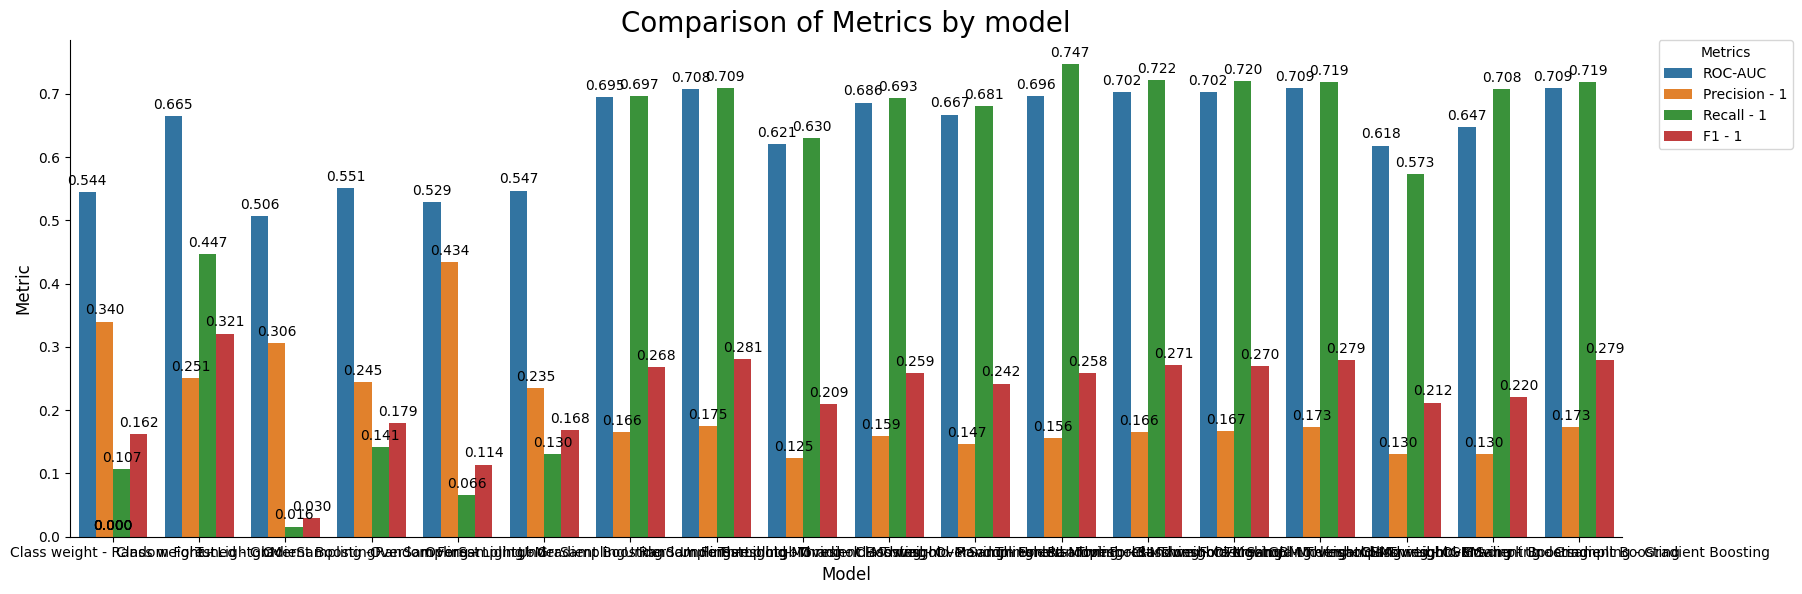

In [440]:
fig, ax1 = plt.subplots(figsize=(18, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_temp, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model", size=20)
plt.legend(bbox_to_anchor=(1.11, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>The results are very similar without time comparison</li>
        <li>We can notice a small lift in the OverSampling - Gradient Boosting results in comparison with Tuned - Gradiend Boosting</li>
        <li>Recall - 1 in OverSampling - LightGBM is a little higher in comparison with the others</li>
    </ul>    
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. Custom evaluations</h2>
</div>

<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. Custom Score</h3>
</div>

<div class="alert alert-block alert-info">
    <p>We need to penalize the <b>False Negative</b> that are loands <b>will be in default</b>, and they were <b>predicted incorrectly</b>.<br>Due to that, we are going to define a <b>Custom Score</b>.
    </p>
</div>

In [166]:
def custom_score(y_test, y_pred):
    """
    Method used to calculate a score based on the penalization of False Negatives.

    Parameters:
    -----------------
        y_test (series): True values
        y_pred (series): Predicted values
        threshold (float): Threshold value to use
        
    Returns:
    -----------------
        Score. (float): Score obtained based on the rules defined to measure. 
    """
    
    TN_rate = 1        # Loans that are not in default and were predicted correctly
    TP_rate = 1        # Loans that are in default and were predicted correctly
    FP_rate = -1        # Loans that are not in default and were predicted incorrectly
    FN_rate = -10      # Loans that are in default and were were predicted incorrectly
    
    # Getting all values based on confusion matrix
    (TN, FP, FN, TP) = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

    # Total of default and not default cases
    total_not_default = TN + FP     # Not default cases
    total_default = TP + FN         # Default cases 
    
    gain_total = TN*TN_rate + TP*TP_rate + FP*FP_rate + FN*FN_rate
    gain_maximun = total_not_default*TN_rate + total_default*TP_rate
    gain_minumun = total_not_default*TN_rate + total_default*FN_rate
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain_total - gain_minumun) / (gain_maximun - gain_minumun)
    
    return score

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Feature selection</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to apply a Feature Selection on OverSampling - LightGBM. To do that we are going to use one of the more popular methods</p>
    <ul style="list-style-type: square;">
        <li>Select the top k variables: SelectKBest</li>
    </ul>
</div>

In [193]:
df_best_model = df_models_metrics_complete[df_models_metrics_complete["Model"]=="OverSampling - LightGBM"]
df_best_model

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration (min)
4,OverSampling - LightGBM,0.136,0.771,0.877,0.463,0.248,0.323,12.8


<div class="alert alert-block alert-info">
    <p>First of all, we are going to identify how many features we can keep</p>
</div>

In [194]:
fs = SelectKBest(score_func=f_classif)

In [195]:
fs.fit(X_train_fs, y_train)

C:\Python\venv\env_P7\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [223 228 244 278 286 289 315 320 325 335 348 377 383 387 396 408 414 478] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Python\venv\env_P7\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest()

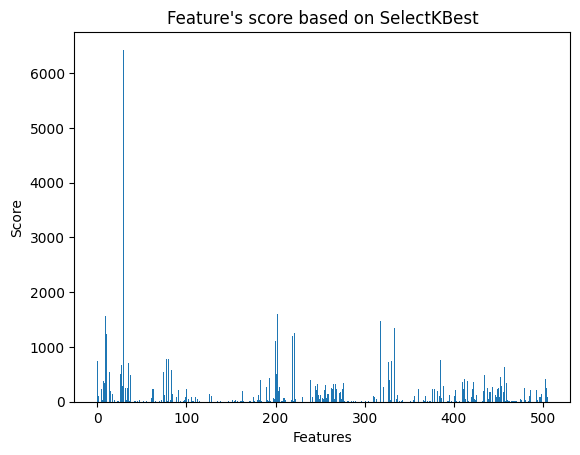

In [196]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,)
plt.title("Feature's score based on SelectKBest")
plt.ylabel("Score")
plt.xlabel("Features")
# Testplt.show()

In [ ]:
# Test alternative plot 

# Calculate the cumulative sum of the feature scores
cumulative_scores = np.cumsum(fs.scores_)

# Plot the cumulative sum using histplot
sns.histplot(data=cumulative_scores, cumulative=True)
plt.title("Cumulative Feature Score Distribution")
plt.xlabel("Cumulative Score")
plt.ylabel("Count")

# Calculate the threshold for 80% of the cumulative sum
threshold = np.sum(fs.scores_) * 0.8

# Add a vertical line at the threshold
plt.axvline(x=threshold, color='red', linestyle='--', label='80% Threshold')

plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Based on the Score's plot, we can decide only to keep 150 features.</p>
</div>

In [197]:
fs = SelectKBest(score_func=f_classif, k=150)

In [198]:
fs.fit(X_train_fs, y_train)

C:\Python\venv\env_P7\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [223 228 244 278 286 289 315 320 325 335 348 377 383 387 396 408 414 478] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Python\venv\env_P7\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=150)

In [199]:
# X_train_fs = fs.transform(X_train)
# X_test_fs = fs.transform(X_test)

In [200]:
print("X_train:\t {}".format(X_train.shape))
print("X_train_fs:\t {}".format(X_train_fs.shape))
print("----------------------------------")
print("X_test:\t\t {}".format(X_test.shape))
print("X_test_fs:\t {}".format(X_test_fs.shape))

X_train:	 (246005, 506)
X_train_fs:	 (246005, 150)
----------------------------------
X_test:		 (61502, 506)
X_test_fs:	 (61502, 150)


<div class="alert alert-block alert-info">
    <p>Now, let's test the best model</p>
    <p>Executing the model with the <b>new dataset</b></p>
</div>

In [ ]:
start_time_model = timeit.default_timer()

clf_lgbm_os.fit(X_train_fs, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

<div class="alert alert-block alert-info">
    <p>Predict the probabilities</p>
</div>

In [202]:
y_prob = clf_lgbm_os.predict_proba(X_test_fs)
y_prob = y_prob[:, 1]

<div class="alert alert-block alert-info">
    <p>Let's selet the threshold based on the best parameters</p>
</div>

Best results
- Best Threshold:	 0.152
- Best Score:		 0.191




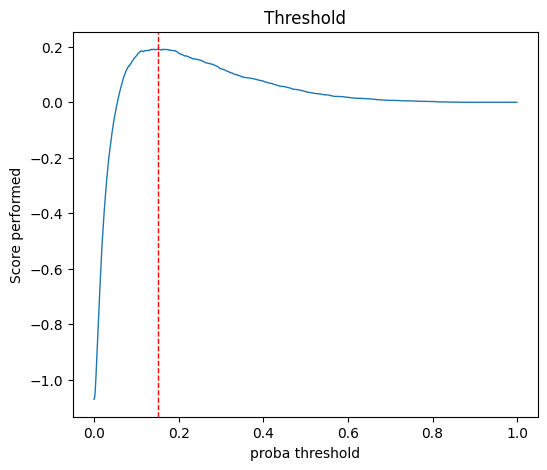

In [203]:
threshold = threshold_selection(y_test, y_prob)

<div class="alert alert-block alert-info">
    <p>Making the predictions based on the probabilities and threshold</p>
</div>

In [204]:
y_pred = (y_prob >= threshold).astype(int)

<div class="alert alert-block alert-info">
    <p>Now, we can get the metrics</p>
</div>

In [205]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

<div class="alert alert-block alert-info">
    <p>Plotting the Confusion Matrix</p>
</div>

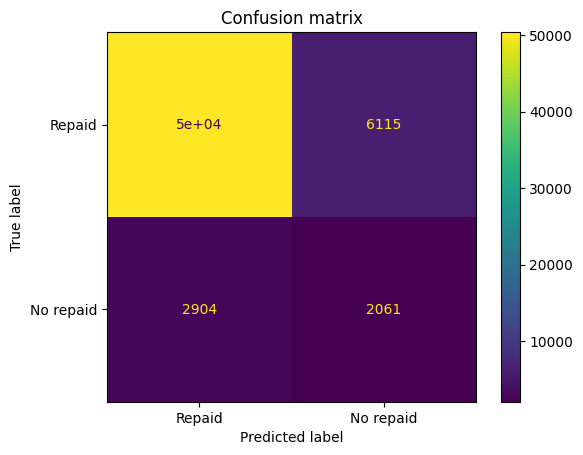

In [206]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', display_labels=["Repaid", "No repaid"])
_ = display.ax_.set_title("Confusion matrix")

<div class="alert alert-block alert-info">
    <p>Plotting the Compute ROC curve and ROC area for each class</p>
</div>

C:\Users\blede\AppData\Local\Temp\ipykernel_6576\3217460912.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())


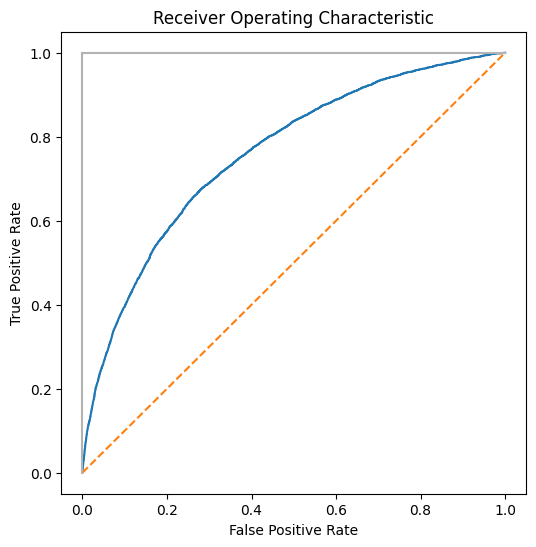

In [207]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

<div class="alert alert-block alert-info">
    <p>Plotting the Precision-Recall curve</p>
</div>

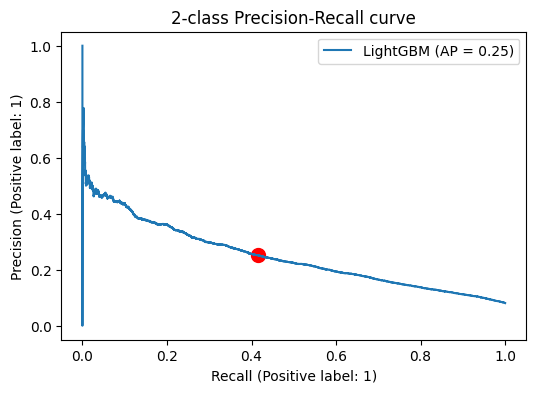

In [208]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["LightGBM (AP = %.2f)"% (precision)], loc=0)
plt.show()

<div class="alert alert-block alert-info">
    <p>Let's save the metrics to compare against the others models</p>
</div>

In [209]:
df_temp = pd.DataFrame({
    "Model" : ["OverSampling / SelectKBest - LightGBM"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration (min)" : round(end_time_model/60, 1)
})

In [210]:
df_best_model = pd.concat([df_best_model, df_temp])
df_best_model.reset_index(drop=True, inplace=True)
df_best_model

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration (min)
0,OverSampling - LightGBM,0.136,0.771,0.877,0.463,0.248,0.323,12.8
1,OverSampling / SelectKBest - LightGBM,0.152,0.760,0.892,0.415,0.252,0.314,6.0


<div class="alert alert-block alert-info">
    <p>Let's plot all metrics</p>
</div>

In [211]:
df_temp = pd.melt(df_best_model, id_vars="Model", var_name="Metric", value_name="Value")
df_temp.head()

,Model,Metric,Value
0,OverSampling - LightGBM,Threshold,0.136
1,OverSampling / SelectKBest - LightGBM,Threshold,0.152
2,OverSampling - LightGBM,ROC-AUC,0.771
3,OverSampling / SelectKBest - LightGBM,ROC-AUC,0.760
4,OverSampling - LightGBM,Recall - 0,0.877


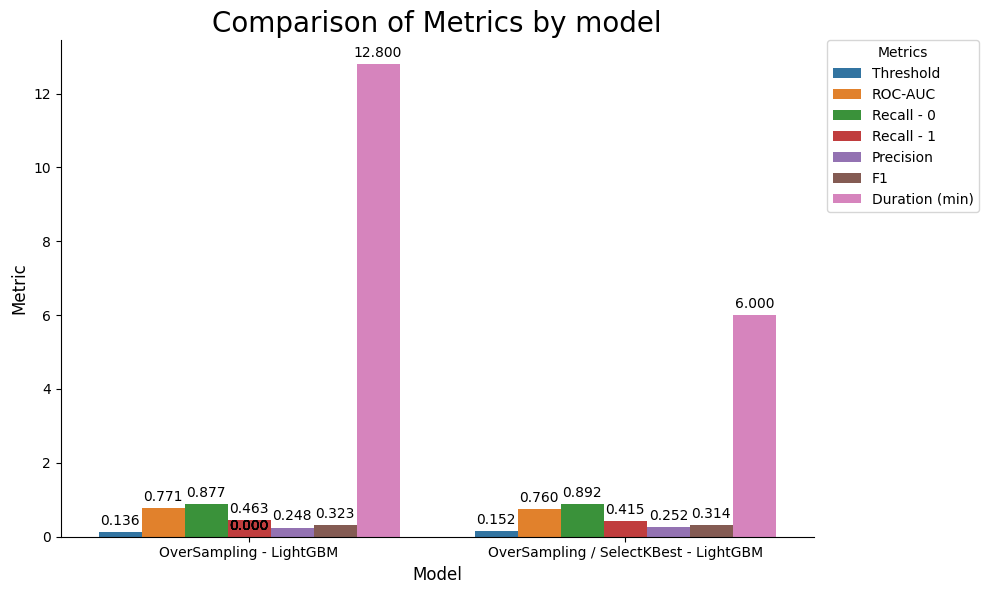

In [212]:
fig, ax1 = plt.subplots(figsize=(10, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_temp, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model", size=20)
plt.legend(bbox_to_anchor=(1.22, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>The results are very similar, but the execution time is half.</p>
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">11. Model interpretation</h2>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to interpret the model based on the <b>Class weight / SelectKBest - LightGBM</b> model </p>
    <p>But first, we have to identify the features selected</p>
</div>

In [213]:
cols = fs.get_support(indices=True)

In [214]:
X_k_best_features = X.iloc[:, cols]

In [215]:
df_analysis(X_k_best_features, "X_k_best_features", analysis_type="header")


Analysis Header of X_k_best_features dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 150 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 151.9 MB


<div style="background-color: #229954;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">11.1. Global interpretation</h3>
</div>

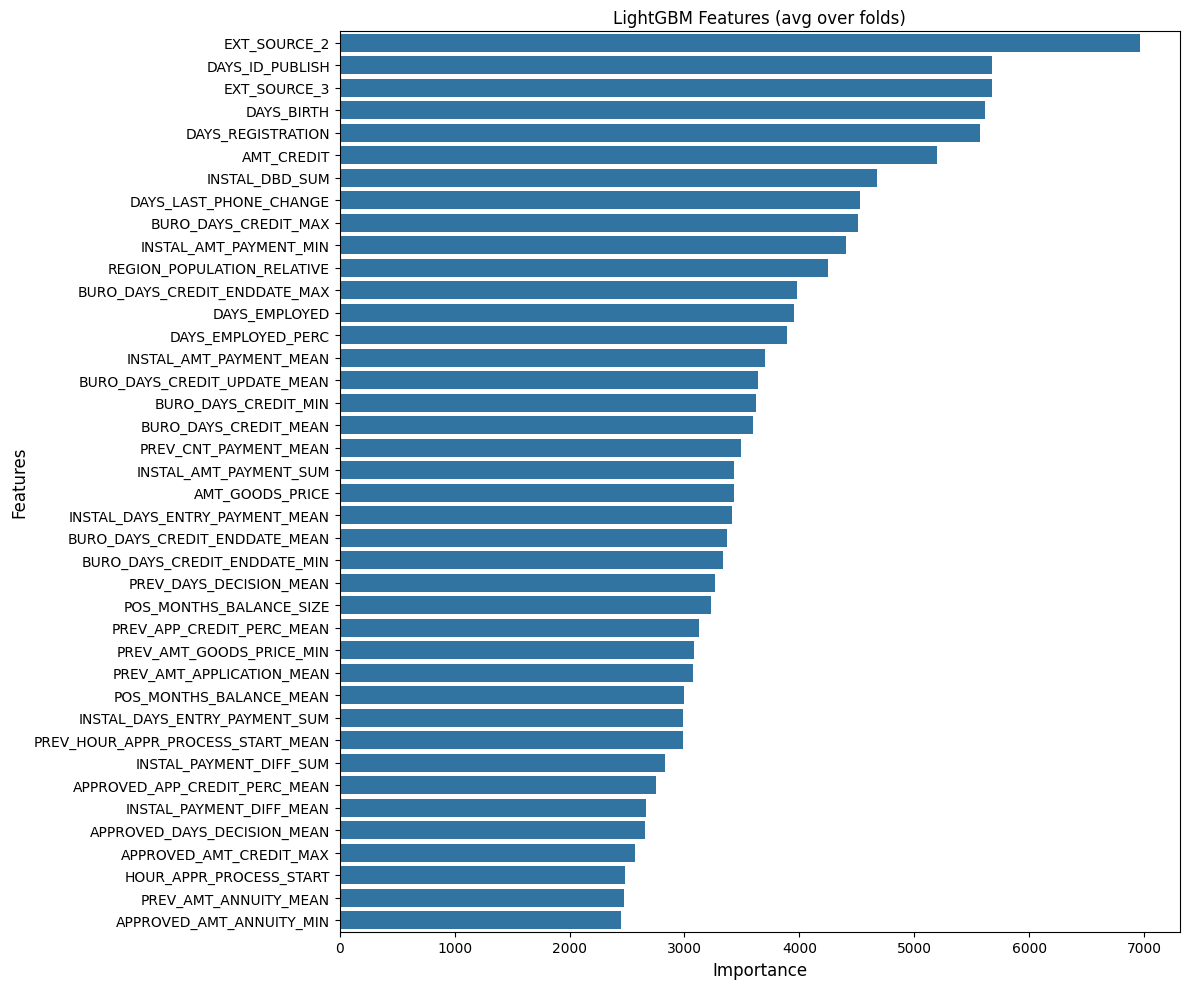

In [216]:
# Feature importance
feature_importance_df_ = pd.DataFrame({"importance":clf_lgbm_os["LightGBM"].feature_importances_, "feature":X_k_best_features.columns})

cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
plt.figure(figsize=(12, 10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.xlabel("Importance", fontsize=12);
plt.ylabel("Features", fontsize=12);
plt.title("LightGBM Features (avg over folds)")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>Within the most important features, we can see: </p>
    <ul style="list-style-type: square;">
        <li>EXT_SOURCE_2 and EXT_SOURCE_3: Data that comes from other financial institutions</li>
        <li>DAYS_BIRTH, DAYS_REGISTRATION: Age and antiquity of the person in the bank</li>
        <li>AMT_CREDIT: Previous credits application in the bank</li>
        <li>_MAX, _SUM, _MEAN, _PERC, _MIN: Characteristics from the feature engineering</li>
    </ul>    
</div>

<div class="alert alert-block alert-info">
    <p>To make the local interpretation, we are going to use SHAP</p>
    <p>But first, we need to have our reduced dataset based on the Feature selection done</p>
</div>

In [217]:
cols = fs.get_support(indices=True)

In [218]:
df_X_test_fs = pd.DataFrame(
    data=X_test_fs, columns=X.iloc[:, cols].columns
)
df_X_test_fs.shape

(61502, 150)

In [219]:
df_X_test_fs_os, y_resampled = clf_lgbm_os["Smote"].fit_resample(df_X_test_fs, y_test)

C:\Python\venv\env_P7\Lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [220]:
clf_lgbm_os_explainer = shap.TreeExplainer(clf_lgbm_os["LightGBM"])

NameError: name 'shap' is not defined

In [ ]:
clf_lgbm_os_shap_values = clf_lgbm_os_explainer.shap_values(df_X_test_fs_os)

<div class="alert alert-block alert-info">
    <p>Now we are going to analyze the result and influence of some features over an observation</p>
    <p>In this case, we are going to take an observation who is in default</p>
</div>

In [ ]:
y_pred[10]

In [ ]:
shap.force_plot(clf_lgbm_os_explainer.expected_value[0], 
                clf_lgbm_os_shap_values[0][10, :], 
                df_X_test_fs.iloc[10, :])

![Observation with target 1](images/in_default_1.png)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>We can notice that EXT_SOURCE_2, EXT_SOURCE_3 and AMT_GOODS_PRICE have a strong influence in the result for this observation pushing the prediction to the right</li>
    </ul> 
</div>

<div class="alert alert-block alert-info">
    <p>Let's analyze an observation is not in default</p>
</div>

In [ ]:
y_pred[0]

In [ ]:
shap.force_plot(clf_lgbm_os_explainer.expected_value[0], 
                clf_lgbm_os_shap_values[0][0, :], 
                df_X_test_fs.iloc[0, :])

![Observation with target 1](images/not_in_default_0.png)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>In this case, EXT_SOURCE_3 pushs the prediction to the left</li>
    </ul> 
</div>

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">12. Final re-training</h2>
</div>

<div class="alert alert-block alert-info">
    <p>We are going to apply our Feature Selection on the whole dataset excluding target variable</p>
</div>

In [ ]:
X_fs = fs.transform(X)

<div class="alert alert-block alert-info">
    <p>Let's take advantages and save the features selected as dataset</p>
</div>

In [ ]:
cols = fs.get_support(indices=True)

In [ ]:
df_X = X.iloc[:, cols]

In [ ]:
df_X.shape

In [ ]:
data_key_feature_selected = "df_current_clients_feature_selected.csv"

In [ ]:
df_X.to_csv(data_location_feature_selected, index=False)

<div class="alert alert-block alert-info">
    <p>Now, Let's do the same for the clients to predict. In this way, we are going to save time at the time of execution</p>
</div>

In [ ]:
df_clients_to_predict = df_clients_to_predict[TRAINING_COLUMNS]

In [ ]:
df_clients_to_predict_fs = fs.transform(df_clients_to_predict)

In [ ]:
cols = fs.get_support(indices=True)

In [ ]:
df_clients_to_predict_fs = df_clients_to_predict.iloc[:, cols]

In [ ]:
df_clients_to_predict_fs.shape

In [ ]:
data_key_client_to_predict_feature_selected = "df_clients_to_predict_feature_selected.csv"

In [ ]:
df_clients_to_predict_fs.to_csv(data_location_client_to_predict_feature_selected, index=False)

<div class="alert alert-block alert-info">
    <p>Now, we can make the modelisation based on the current clients</p>
</div>

In [ ]:
clf_lgbm_os.fit(X_fs, y_target)

In [ ]:
joblib.dump(clf_lgbm_os, "models/model_{version}.pkl".format(version=20220220))